In [ ]:
#doing this manually because I hate myself, but not enough to automate it
#[directory, filename, fitJSON for t0]
filePathsOrderedWavScan = []
#STD
filePathsOrderedWavScan.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\STD-680", r"saturation_2024-01-16_14-09.mat",  r"TAfitPump653Probe680_DecayCorrected.JSON", r"SummaryPump653Probe680.JSON"])
filePathsOrderedWavScan.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\STD-520", r"saturation_2024-01-16_15-21.mat",  r"TAfitPump653Probe520_DecayCorrected.JSON", r"SummaryPump653Probe520.JSON"])
filePathsOrderedWavScan.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\STD-502", r"saturation_2024-01-16_14-51.mat",  r"TAfitPump653Probe502_DecayCorrected.JSON", r"SummaryPump653Probe502.JSON"])
filePathsOrderedWavScan.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\STD-493", r"saturation_2024-01-19_14-24.mat",  r"TAfitPump653Probe493_DecayCorrected.JSON", r"SummaryPump653Probe493Caution.JSON"])
#SHG
filePathsOrderedWavScan.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-468", r"saturation_2024-01-16_18-38.mat",  r"TAfitPump653Probe468_DecayCorrected.JSON", r"SummaryPump653Probe468.JSON"])
filePathsOrderedWavScan.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-460", r"saturation_2024-01-18_17-34.mat",  r"TAfitPump653Probe460_DecayCorrected.JSON", r"SummaryPump653Probe460Caution.JSON"])
filePathsOrderedWavScan.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-450", r"saturation_2024-01-18_11-28.mat",  r"TAfitPump653Probe450_DecayCorrected.JSON", r"SummaryPump653Probe450.JSON"])
filePathsOrderedWavScan.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-440", r"saturation_2024-01-16_19-07.mat",  r"TAfitPump653Probe440_DecayCorrected.JSON", r"SummaryPump653Probe440.JSON"])
filePathsOrderedWavScan.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-430", r"saturation_2024-01-18_10-52.mat",  r"TAfitPump653Probe430_DecayCorrected.JSON", r"SummaryPump653Probe430.JSON"])
filePathsOrderedWavScan.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-420", r"saturation_2024-01-17_14-46.mat",  r"TAfitPump653Probe420_DecayCorrected.JSON", r"SummaryPump653Probe420.JSON"])
filePathsOrderedWavScan.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-410", r"saturation_2024-01-19_13-41.mat",  r"TAfitPump653Probe410_DecayCorrected.JSON", r"SummaryPump653Probe410Caution.JSON"])
filePathsOrderedWavScan.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-400", r"saturation_2024-01-17_15-26.mat",  r"TAfitPump653Probe400_DecayCorrected.JSON", r"SummaryPump653Probe400.JSON"])
filePathsOrderedWavScan.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-390", r"saturation_2024-01-18_12-03.mat",  r"TAfitPump653Probe390_DecayCorrected.JSON", r"SummaryPump653Probe390.JSON"])
filePathsOrderedWavScan.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-380", r"saturation_2024-01-17_16-31.mat",  r"TAfitPump653Probe380_2_DecayCorrected.JSON", r"SummaryPump653Probe380_2.JSON"])
filePathsOrderedWavScan.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-370", r"saturation_2024-01-17_17-11.mat",  r"TAfitPump653Probe370_DecayCorrected.JSON", r"SummaryPump653Probe370.JSON"])
filePathsOrderedWavScan.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-360", r"saturation_2024-01-18_15-50.mat",  r"TAfitPump653Probe360_DecayCorrected.JSON", r"SummaryPump653Probe360_2.JSON"])
filePathsOrderedWavScan.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-350", r"saturation_2024-01-18_16-39.mat",  r"TAfitPump653Probe350_DecayCorrected.JSON", r"SummaryPump653Probe350.JSON"])

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import constants as const
import plotHelperLatex
plotHelperLatex.setMatplotSettings()
#plt.rcParams['text.usetex'] = True

#Sellmeier equation
def n_squared(lamb, coeffs):
    '''lamb in µm'''
    n2 = 1
    lsquare = lamb**2
    for index in range(3):
        n2 = n2 + coeffs[index, 0]*lsquare/(lsquare-coeffs[index, 1]**2)
    return n2

#Lensmaker equation
def lensmaker(n, R1, R2, d=0):
    '''Returns 1/focal length'''
    f_inv = (n-1)*(1/R1 - 1/R2 + (n-1)*d/(n*R1*R2))
    return f_inv


def wavToEnergy(lamb):
    #Energy in eV, lamb in nm
    return const.h*const.c/lamb*1e9/const.elementary_charge

def energyToWav(E):
    #Energy in eV, lamb in nm
    return const.h*const.c/E*1e9/const.elementary_charge



#https://refractiveindex.info/?shelf=glass&book=fused_silica&page=Malitson
#Maltison 1965 UV fused silica: 0.21 µm - 3.71 µm
coeffsUVFS = np.array([[0.6961663, 0.0684043], [0.4079426, 0.1162414], [0.8974794, 9.896161]])

#Energy range is 1.3 eV to 5 eV in .1 eV steps
energies = np.linspace(1.3, 5, 37)*const.elementary_charge
wavs = const.h*const.c/energies


fig1, axs1 = plt.subplots(1,1, layout='constrained', figsize = plotHelperLatex.figSizer(1, 2.2), dpi = 288)
#fig2, axs2 = plt.subplots(1,1, layout='constrained', figsize = (6,4), dpi=200)
#µm for sellmeier
n_wav = np.sqrt(n_squared(wavs*1e6, coeffsUVFS))
axs1.plot(wavs*1e9, n_wav)
axs1.set_ylabel('n / 1')
axs1.set_xlabel(r'$\lambda$ / nm')
axs1.set_xticks(np.arange(250, 951, 100))
secax0 = axs1.secondary_xaxis('top', functions=(wavToEnergy, energyToWav))
secax0.set_xticks([1.5, 2, 3, 4, 5])
secax0.set_xlabel("E / eV")

#second part with focal distance
R1 = 59.5
yaxisNtoF = lambda n_in: -1/lensmaker(n_in, np.inf, R1)
#only for the particular case of plano conves
yaxisFtoN = lambda f_in: (1+R1/f_in)

print(yaxisNtoF(yaxisFtoN(100)))
focal_distance = -lensmaker(n_wav, np.inf, R1)
focal_distance = 1/focal_distance
#axs1.plot(wavs*1e9, yaxisFtoN(focal_distance), 'r')
#axs1.set_ylabel('f / mm')
#axs1.set_xlabel(r'$\lambda$ / nm')
#axs1.set_xticks(np.arange(250, 951, 100))



secax1 = axs1.secondary_yaxis('right', functions=(yaxisNtoF, yaxisFtoN))
#secax1.set_xticks([1.5, 2, 3, 4, 5])
secax1.set_ylabel('f / mm')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import plotHelperLatex
plotHelperLatex.setMatplotSettings()

#taken from edmund optics: Laser Optics and Resource Guide Section 2: Gaussian Beam Propagation

w_c = lambda w0, lamb, z: w0*np.sqrt(1+(lamb*z/(np.pi*w0**2))**2)
w0_c = lambda lamb, theta: lamb/np.pi/theta
zr_c = lambda lamb, w0: np.pi*w0**2/lamb

#collimated beam through lens with focal distance f
#taken from angular aperture
theta_c = lambda D, f: np.arctan(D/(2*f))



wav = 653e-9 # nm
#https://refractiveindex.info/?shelf=glass&book=fused_silica&page=Malitson
#Maltison 1965 UV fused silica: 0.21 µm - 3.71 µm
coeffsUVFS = np.array([[0.6961663, 0.0684043], [0.4079426, 0.1162414], [0.8974794, 9.896161]])
n = np.sqrt(n_squared(wav*1e6,coeffsUVFS))
f = 1/lensmaker(n, 59.4, np.inf)*1e-3

diameters = np.array([1, 2, 3, 4])*1e-3 # mm
thet = theta_c(diameters, f)
w0 = w0_c(wav, thet)
#print(w0*2)

zr = zr_c(wav, w0[1])

z = np.linspace(-5e-4, zr/2, 200)


#plt.tight_layout()

fig1, axs1 = plt.subplots(1,1, layout='constrained', figsize = plotHelperLatex.figSizer(2,1.4), dpi=144)
fig2, axs2 = plt.subplots(1,1, layout='constrained', figsize = plotHelperLatex.figSizer(1.6, 1.4), dpi=144)
#fig.suptitle("653 nm beam waist")
labelz = z[0]
for index in range(len(diameters)):
    axs1.plot(z*1e3, w_c(w0[index], wav, z)*2e6, label="%.1f mm" %(diameters[index]*1e3))
    axs1.text(labelz*1e3-0.65, w_c(w0[index], wav, labelz)*2e6, s="%.1f mm" %(diameters[index]*1e3), fontdict = {"fontsize": "small", "va": "center", "color": fig1.gca().lines[-1].get_color()})
axs1.set_xlabel("z / mm")
axs1.set_ylabel("beam waist / µm")
axs1.set_xlim((-1.2, 2))
axs1.yaxis.tick_right()
axs1.yaxis.set_label_position('right')



z = np.linspace(-2e-4, zr/4, 200)

labelz = z[-1]
for index in range(len(diameters)):
    axs2.plot(z*1e3, 1/(w_c(w0[index], wav, z)/w0[index])**2, label="%.1f mm" %(diameters[index]*1e3))
    axs2.text(labelz*1e3+0.01, 1/(w_c(w0[index], wav, labelz)/w0[index])**2, s="%.1f mm" %(diameters[index]*1e3), fontdict = {"fontsize": "small", "va": "center", "color": fig2.gca().lines[-1].get_color()})
axs2.set_xlabel("z / mm")
axs2.set_ylabel("relative maximum intensity / a.u.")
axs2.set_xlim((-0.3,1.1))

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import plotHelperLatex
plotHelperLatex.setMatplotSettings()

#taken from edmund optics: Laser Optics and Resource Guide Section 2: Gaussian Beam Propagation

w_c = lambda w0, lamb, z: w0*np.sqrt(1+(lamb*z/(np.pi*w0**2))**2)
w0_c = lambda lamb, theta: lamb/np.pi/theta
zr_c = lambda lamb, w0: np.pi*w0**2/lamb

#collimated beam through lens with focal distance f
#taken from angular aperture
theta_c = lambda D, f: np.arctan(D/(2*f))


dia = 2.5e-3 # m
wavs = np.array([250,300, 400, 500, 600, 700, 800, 900])*1e-9 #wavs in m
n = np.sqrt(n_squared(wav*1e6,coeffsUVFS))
f = 1/lensmaker(n, 59.4, np.inf)*1e-3
thet = theta_c(dia, f)
w0 = w0_c(wavs, thet)

zr = np.max(zr_c(wavs, w0))

z = np.linspace(-2e-4, zr/4, 200)
zlabel = z[-1]
plt.figure()
fig1, axs1 = plt.subplots(1,1, layout='constrained', figsize = plotHelperLatex.figSizer(2,1.4), dpi=144)
#plt.title("Beam waist vs wavelength behavior at 2 mm collimated waist")
for index in range(len(wavs)):
    axs1.plot(z*1e3, w_c(w0[index], wavs[index], z)*2e6, label="%.1f nm" %(wavs[index]*1e9))
    axs1.text(zlabel*1e3+0.01, w_c(w0[index], wavs[index], zlabel)*2e6, s="%.0f nm" %(wavs[index]*1e9), fontdict = {"fontsize": "small", "va": "center", "color": plt.gca().lines[-1].get_color()})
axs1.set_xlabel("z / mm")
axs1.set_ylabel("beam waist / µm")
axs1.set_xlim((-0.2, 1.05))
#plt.legend()



plt.show()

### Overlap normalised by max pump

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import plotHelperLatex
plotHelperLatex.setMatplotSettings()

def gaussian(x, sig = 1, mu = 0):
    return 1/(np.sqrt(2*np.pi)*sig)*np.exp(-(x-mu)**2/(2*sig**2))

def gaussProd(x, sig1, sig2, mu1, mu2):
    mu_n = (mu1*sig2**2 + mu2*sig1**2)/(sig1**2 + sig2**2)
    sig_n = sig1*sig2/np.sqrt(sig1**2 + sig2**2)
    return 1/(np.sqrt(2*np.pi)*sig_n)*np.exp(-(x-mu_n)**2/(2*sig_n**2))

def cFactor(sigPump, sig2, mu1, mu2):
    return np.sqrt((sigPump**2 + sig2**2)/sigPump**2)*np.exp((mu1-mu2)**2/(2*(sigPump**2+sig2**2)))



def plotVisGaussians(x, sig2, dmu, norm = True, ax=None, colors = ["blue", "royalblue"]):
    if ax == None:
        fig, ax = plt.subplots(1,1)
    #probe
    #ax.plot(x, gaussian(x, 1, -dmu/2), label = r"probe: $\sigma$ = 1; $\mu = %.1f$" %(-dmu/2))
    #pump r"pump: $\sigma$ = %d; $\mu = %.1f$" %(sig2, dmu)
    ax.plot(x, gaussian(x, sig2, dmu), label = r"pump", color = colors[0], linestyle="dotted")
    #overlap
    if norm == True:
        ax.plot(x, gaussProd(x, 1, sig2, -dmu, 0), "r--", label = r"overlap")
    elif norm == False:
        relativeGaussiantoProbe = gaussian(x,1,0)*gaussian(x, sig2, dmu)/max(gaussian(x, sig2, +dmu))
        #plt.plot(x, relativeGaussiantoProbe, "r--", label = r"overlap")
        ax.fill_between(x, relativeGaussiantoProbe, hatch='/', color=colors[1], facecolor="None")
    ax.legend()
    ax.set_xlabel(r"x / $\sigma_{probe}$")
    ax.set_ylabel(r"I / a.u.")
    ax.set_title(r"$\frac{\sigma_{pump}}{\sigma_{probe}} = %.1d$, $\Delta\mu$ = %.1f $\sigma_{probe}$,  C = %.2f" %(sig2,dmu, cFactor(sig2, 1, dmu,0)), pad=8)
    #plt.show()
    return ax


x = np.linspace(-3, 3, 200)
fig, axs = plt.subplots(3,1, figsize = plotHelperLatex.figSizer(1,1.4), dpi=288, sharex=True)
for ver in range(3):
    #plot probe first
    axs[ver].plot(x, gaussian(x, 1, 0), label = r"probe", color="teal")


#case 1 µ1 = µ2, sig 1 >> sig 2
#
sig2 = 1 #times sig 1; sig2 is pump
dmu = 1.5
plotVisGaussians(x, sig2, dmu, False, ax= axs[1])

sig2 = 1 #times sig 1; sig2 is pump
dmu = 0
plotVisGaussians(x, sig2, dmu, False, colors = ["orangered", "orangered"], ax=axs[0])

sig2 = 5 #times sig 1; sig2 is pump
dmu = 0
plotVisGaussians(x, sig2, dmu, False, ax= axs[2], colors=["purple", "purple"])
fig.subplots_adjust(hspace=0)
plt.tight_layout()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import plotHelperLatex
plotHelperLatex.setMatplotSettings()

def gaussian(x, sig = 1, mu = 0):
    return 1/(np.sqrt(2*np.pi)*sig)*np.exp(-(x-mu)**2/(2*sig**2))

def gaussProd(x, sig1, sig2, mu1, mu2):
    mu_n = (mu1*sig2**2 + mu2*sig1**2)/(sig1**2 + sig2**2)
    sig_n = sig1*sig2/np.sqrt(sig1**2 + sig2**2)
    return 1/(np.sqrt(2*np.pi)*sig_n)*np.exp(-(x-mu_n)**2/(2*sig_n**2))

def cFactor(sigPump, sig2, mu1, mu2):
    return np.sqrt((sigPump**2 + sig2**2)/sigPump**2)*np.exp((mu1-mu2)**2/(2*(sigPump**2+sig2**2)))



def plotVisGaussians(x, sig2, dmu):
    plt.figure()
    #probe
    plt.plot(x, gaussian(x, 1, -dmu/2), label = r"probe: $\sigma$ = 1; $\mu = %.1f$" %(-dmu/2))
    #pump
    plt.plot(x, gaussian(x, 2, +dmu/2), label = r"pump: $\sigma$ = %d; $\mu = %.1f$" %(sig2, dmu/2))
    #overlap
    plt.plot(x, gaussProd(x, 1, sig2, -dmu/2, dmu/2), "r--", label = r"overlap")
    plt.legend()
    plt.xlabel(r"x / $\sigma$")
    plt.ylabel(r"I / a.u.")
    plt.title(r"C = %.2e" %(cFactor(sig2, 1, dmu,0)))
    plt.show()

def plotCompareGaussians(x, sigPump, dmu_vec):
    fig = plt.figure()
    #plot pump gaussian
    plt.plot(x, gaussian(x, sigPump, 0))
    for ind in range(len(dmu_vec)):
        plt.plot(x, gaussian(x, 1, dmu_vec[ind]), label="C = %.3f" %cFactor(sigPump, 1, 0, dmu_vec[ind]))

    plt.legend()
    plt.show()
    fig.clear()

#case 1 µ1 = µ2, sig 1 >> sig 2
#
sig2 = 3 #times sig 1; sig2 is pump
dmu = 0 

x = np.linspace(-3, 3, 200)
dmu = [0, 0.1, 0.3, 0.5]
sigPump = 3
plotCompareGaussians(x, sigPump, dmu*sigPump)
sigPump = 2
plotCompareGaussians(x, sigPump, dmu*sigPump)
sigPump = 1
plotCompareGaussians(x, sigPump, dmu*sigPump)



### New binning with interpolation in test_binning_interpol

In [ ]:
#Test binning of numerical correction factor
import numpy as np
from matplotlib import pyplot as plt
import plotHelperLatex
plotHelperLatex.setMatplotSettings()

def gaussian(x, sig = 1, mu = 0):
    return 1/(np.sqrt(2*np.pi)*sig)*np.exp(-(x-mu)**2/(2*sig**2))

def cFactor(sigPump, sig2, mu1, mu2):
    return np.sqrt((sigPump**2 + sig2**2)/sigPump**2)*np.exp((mu1-mu2)**2/(2*(sigPump**2+sig2**2)))

def binMap(map, xBinning, yBinning=0):
    '''N_binning means that N*N pixels are binned together\n
    only takes square z*z maps'''
    if yBinning == 0:
        yBinning = xBinning
    xBins = int(np.shape(map)[0]//xBinning) #along one axis
    yBins = int(np.shape(map)[1]//yBinning) #along one axis
    outmap = map.reshape(xBins, xBinning, yBins, yBinning).sum(3).sum(1)
    return outmap


#using identical gaussians for this
points_per_sig = 1024 #starting value 1000 points for 1 sig distance
sig = 1 #does not matter since I do binning in steps of sig at first
mu = 0
###----analytical cFactor ----###
cFactorAnalytic = cFactor(sig, sig, mu, mu)**2
print("Analytic correction factor:\n " + str(cFactorAnalytic))
###----numeric cFactor ----###
nsig = 5 # how far I measure to the sides
x_like = np.linspace(-nsig*sig,nsig*sig, 2*nsig*points_per_sig)
Xvec, Yvec = np.array(np.meshgrid(x_like,x_like))


gaussStd = gaussian(Xvec, sig, mu)*gaussian(Yvec, sig, mu)



n_steps = 11
binning_steps=np.zeros(n_steps, dtype=int)

for i in range(n_steps):
    binning_steps[i] = 2**i
#print(binning_steps)

#first without added noise
print("Correction Factor numeric, no noise:")
noNoiseGaussCorrection = np.zeros(len(binning_steps))
for ind in range(len(binning_steps)):
    gaussBinned = binMap(gaussStd, binning_steps[ind])
    #pump = np.ones(np.shape(gaussBinned))
    pump = gaussBinned
    probe = gaussBinned
    denominator = np.sum(np.multiply(pump, probe)[:])
    constantPumpIntensity = np.max(pump)
    #print(constantPumpIntensity)
    enumerator = np.sum(constantPumpIntensity*probe[:])
    #this is missing various constant factors, since this is not using the gaussian shape, but is discretized
    noNoiseGaussCorrection[ind] = enumerator/denominator
    print("binning = 1/"+str(binning_steps[ind])+": " + str(noNoiseGaussCorrection[ind]))

plt.figure(dpi = 288, figsize=plotHelperLatex.figSizer(1,2))
plt.plot(np.linspace(n_steps-1,0,n_steps), noNoiseGaussCorrection, label = "no noise")
#with added noise
Noiselevels = [0.05,0.1,0.2]
NoiseGaussCorrection = np.zeros((len(Noiselevels), len(binning_steps)))
for indexSNR, SNR in enumerate(Noiselevels):

    gauss1 = gaussStd + (np.random.rand(np.shape(gaussStd)[0], np.shape(gaussStd)[1])-0.5)*np.max(gaussStd)*SNR
    gauss2 = gaussStd + (np.random.rand(np.shape(gaussStd)[0], np.shape(gaussStd)[1])-0.5)*np.max(gaussStd)*SNR
    
    for ind in range(len(binning_steps)):
        pump = binMap(gauss1, binning_steps[ind])
        probe = binMap(gauss2, binning_steps[ind])
        denominator = np.sum(np.multiply(pump, probe)[:])
        constantPumpIntensity = np.max(pump)
        enumerator = np.sum(constantPumpIntensity*probe[:])
        #this is missing various constant factors, since this is not using the gaussian shape, but is discretized
        NoiseGaussCorrection[indexSNR, ind] = enumerator/denominator
    plt.plot(np.linspace(n_steps-1,0,n_steps), NoiseGaussCorrection[indexSNR], label = "SNR = %.2f dB" %(10*np.log10(1/SNR)), linestyle='dashed')



plt.plot([0,n_steps-1], [2,2], label="analytical correction", linestyle="dotted", color = 'red')
plt.xlabel(r"$\mathrm{log_2}$ of discrete point density per $\sigma$ / 1")
plt.ylabel("correction factor / 1")
plt.ylim([1,2.5])
plt.legend(loc="lower right", fontsize = "small")

In [ ]:
#Test binning of numerical correction factor
#Testing how the offset actually behaves
import numpy as np
from matplotlib import pyplot as plt
import plotHelperLatex
plotHelperLatex.setMatplotSettings()

def gaussian(x, sig = 1, mu = 0):
    return 1/(np.sqrt(2*np.pi)*sig)*np.exp(-(x-mu)**2/(2*sig**2))

def cFactor(sigPump, sig2, mu1, mu2):
    return np.sqrt((sigPump**2 + sig2**2)/sigPump**2)*np.exp((mu1-mu2)**2/(2*(sigPump**2+sig2**2)))

def binMap(map, xBinning, yBinning=0):
    '''N_binning means that N*N pixels are binned together\n
    only takes square z*z maps'''
    if yBinning == 0:
        yBinning = xBinning
    xBins = int(np.shape(map)[0]//xBinning) #along one axis
    yBins = int(np.shape(map)[1]//yBinning) #along one axis
    outmap = map.reshape(xBins, xBinning, yBins, yBinning).sum(3).sum(1)
    return outmap


#using identical gaussians for this
points_per_sig = 1024 #starting value 1000 points for 1 sig distance
sig = 1 #does not matter since I do binning in steps of sig at first
dmu = 1
###----analytical cFactor ----###
#one sigma multiplicator
sigPumpYModifier= 2
sigPumpXModifier = 0.8
cFactorAnalytic = cFactor(sigPumpXModifier*sig, sig, dmu/2, -dmu/2)*cFactor(sigPumpYModifier*sig, sig, dmu/2, -dmu/2)
print("Analytic correction factor:\n " + str(cFactorAnalytic))
###----numeric cFactor ----###
nsig = 5 # how far I measure to the sides
x_like = np.linspace(-nsig*sig,nsig*sig, 2*nsig*points_per_sig)
Xvec, Yvec = np.array(np.meshgrid(x_like,x_like))


n_steps = 11
binning_steps=np.zeros(n_steps, dtype=int)
for i in range(n_steps):
    binning_steps[i] = 2**i

d_offset = [0,0.1,0.2,0.5]
GaussCorrection = np.zeros((len(d_offset),len(binning_steps)))
for indOffset, offset in enumerate(d_offset):

    pumpGauss = gaussian(Xvec, sigPumpXModifier*sig, +dmu/2+offset)*gaussian(Yvec, sigPumpYModifier*sig, +dmu/2)
    probeGauss = gaussian(Xvec, sig, -dmu/2+offset)*gaussian(Yvec, sig, -dmu/2)


    for ind in range(len(binning_steps)):
        pump = binMap(pumpGauss, binning_steps[ind])
        probe = binMap(probeGauss, binning_steps[ind])
        denominator = np.sum(np.multiply(pump, probe)[:])
        constantPumpIntensity = np.max(pump)
        enumerator = np.sum(constantPumpIntensity*probe[:])
        #this is missing various constant factors, since this is not using the gaussian shape, but is discretized
        GaussCorrection[indOffset, ind] = enumerator/denominator


plt.figure(dpi = 288, figsize=plotHelperLatex.figSizer(1,2))
for i in range(len(d_offset)):
    plt.plot(np.linspace(n_steps-1,0,n_steps), GaussCorrection[i], label = r"$\Delta x_\mathrm{grid}$ = %.1f $\sigma$" %(d_offset[i]))
plt.plot([0,n_steps-1], [cFactorAnalytic,cFactorAnalytic], label="analytical correction", linestyle="dotted", color = 'red')
plt.xlabel(r"$\mathrm{log_2}$ of discrete point density per $\sigma$ / 1")
plt.ylabel("correction factor / 1")
plt.legend()
plt.show()

# Plotting of data

[2.82999995e+00 1.01684909e-01 1.13784474e-03 2.47472183e+00
 3.16229458e-02 1.22157902e-03 3.03890671e+00 1.43048599e-01
 7.67530055e-05]
[1.43196023e-02 2.94457985e-02 1.84426631e-04 1.26025996e-01
 2.64350205e-02 1.46718948e-03 3.60125337e-01 4.41148394e-01
 2.24751313e-04]


C:\Users\M\AppData\Local\Temp\ipykernel_15304\4147798108.py:18: RuntimeWarning: divide by zero encountered in divide
  return const.h*const.c/E*1e9/const.elementary_charge


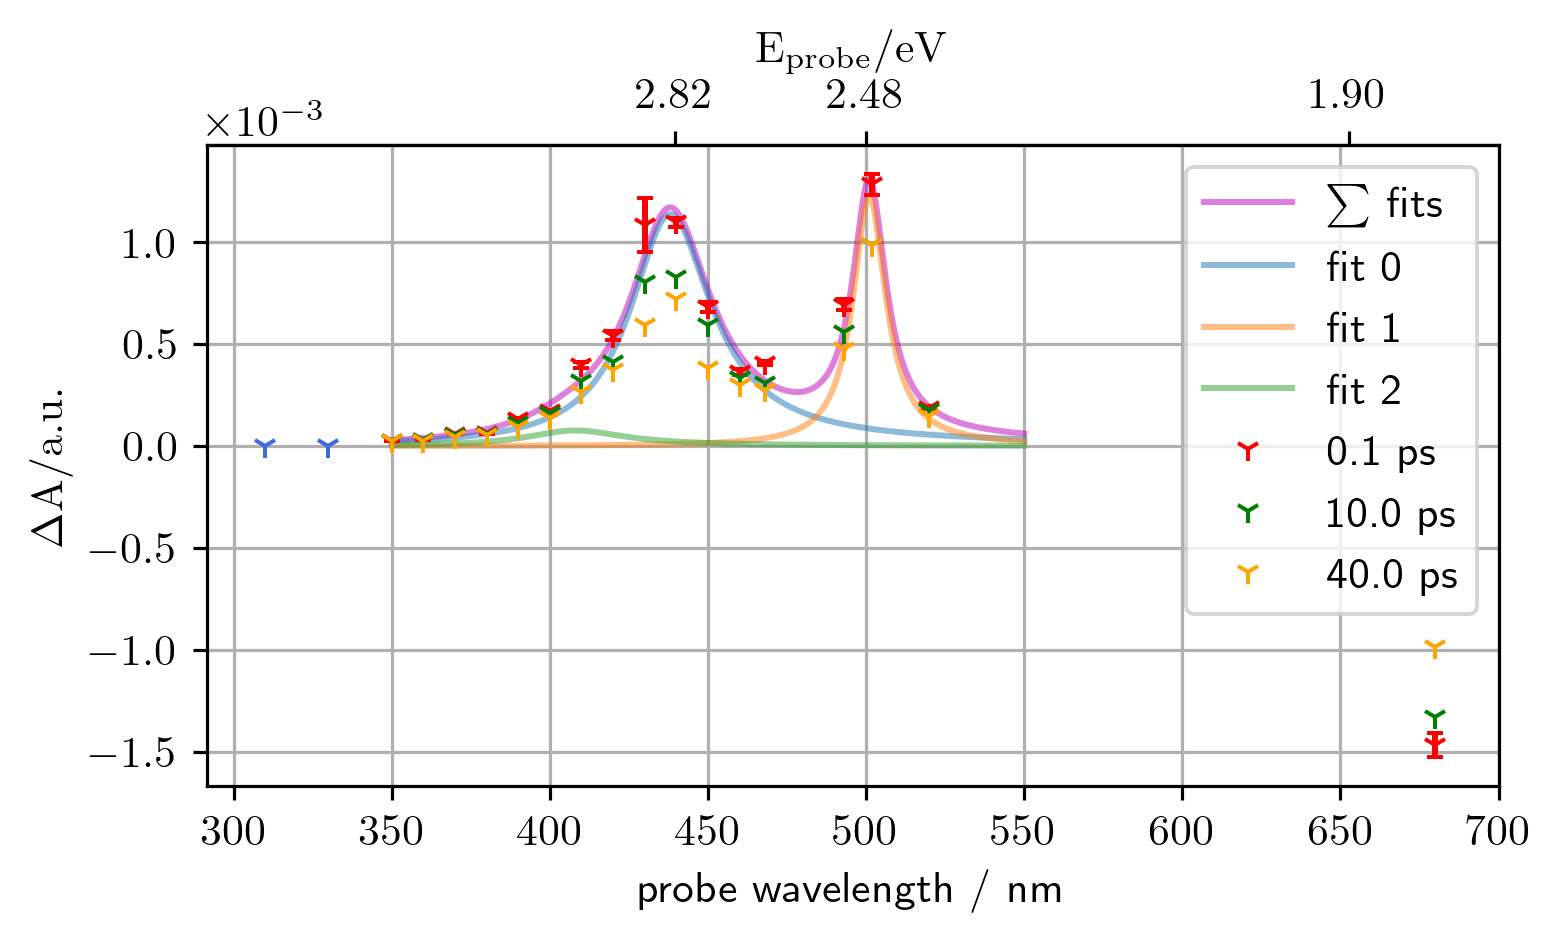

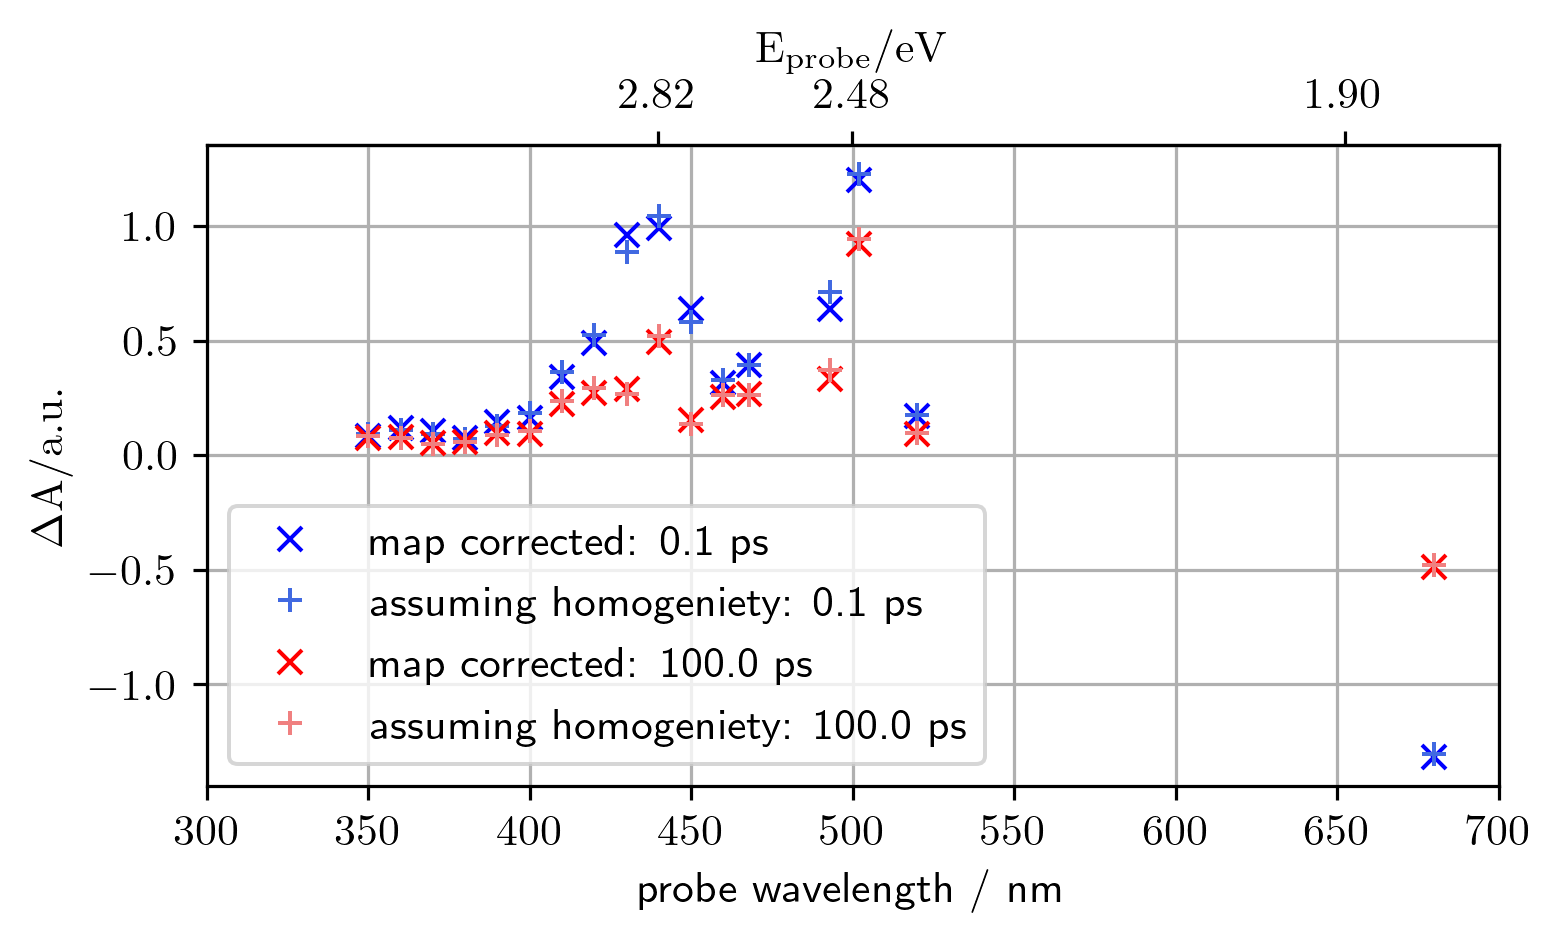

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import constants as const
import numpy as np
import plotHelperLatex
plotHelperLatex.setMatplotSettings()

umPerPx = 6.949
dumPerPx = 4E-2
dRelUmPerPx = dumPerPx/umPerPx

def wavToEnergy(lamb):
    #Energy in eV, lamb in nm
    return const.h*const.c/lamb*1e9/const.elementary_charge

def energyToWav(E):
    #Energy in eV, lamb in nm
    return const.h*const.c/E*1e9/const.elementary_charge


def paramDictatTime(param_dict, time_fs):
    return param_dict['A1']*np.exp(-time_fs/param_dict['tau1']) + param_dict['A2']*np.exp(-time_fs/param_dict['tau2'])
#import data from excel (terrible choice I know, but I want the visualisation and comparability)

def ErrorCorrectionConvoluted(signal, correctionFactor, peakRadiance, dRelUmPerPx, dRelPower):
    '''correctionfactor is already divided with peak radiance\\
    dRelPower = dPower/Power'''
    dPeakRadiance = dRelPower*peakRadiance + 2*peakRadiance*dRelUmPerPx
    return abs(signal*correctionFactor/peakRadiance*dPeakRadiance)

def ErrorCorrectionSimple(signal, correctionFactor, peakRadiance, dRelPower):
    dPeakRadiance = dRelPower*peakRadiance
    return abs(signal*correctionFactor/peakRadiance*dPeakRadiance)

def fitPeaks(x_data, y_data, N_gaussians, centers = [], sigma = [], amplitudes = [], positionBounds = [], ampBounds = [], function = None):
    from scipy.optimize import curve_fit
    startParameters = np.ones(3*N_gaussians)
    min_bounds = []
    max_bounds = []
    if len(centers) != N_gaussians:
        centers = np.linspace(min(x_data), max(x_data),N_gaussians)
    
    if len(amplitudes) != N_gaussians:
        amplitudes = max(np.abs(y_data))/N_gaussians*np.ones(N_gaussians)
    if len(sigma) != N_gaussians:
        sigma = np.ones(N_gaussians)*0.01

    for i in range(N_gaussians):
        startParameters[i*3+1] = sigma[i]
        startParameters[i*3] = centers[i]
        startParameters[i*3+2] = amplitudes[i]

    for i in range(N_gaussians):
        if len(positionBounds) == 0:
            min_bounds.append(min(x_data))
            max_bounds.append(max(x_data))
        else:
            min_bounds.append(positionBounds[i][0])
            max_bounds.append(positionBounds[i][1])
        min_bounds.append(0)
        max_bounds.append(np.inf)
        if len(ampBounds) == 0:
            min_bounds.append(-np.inf)
            max_bounds.append(np.inf)
        else:
            min_bounds.append(ampBounds[0])
            max_bounds.append(ampBounds[1])
    par_bounds = [tuple(min_bounds), tuple(max_bounds)]


    popt, pcov = curve_fit(function, x_data, y_data, 
            p0 = startParameters, 
            bounds = par_bounds,
            method="trf")
    return popt, pcov

def multiGaussianAdditive(x_data, *parameters):
    r'''parameters are parameters[number of gaussian, center/sig/amplitude]'''
    y_out = np.zeros(np.shape(x_data))
    for gaussInd in range(0,len(parameters),3):
        y_out += parameters[gaussInd+2]*np.exp(-np.power(x_data-parameters[gaussInd+0], 2)/(2*np.power(parameters[gaussInd+1],2)))
    return y_out

def multiLorentzianAdditive(x_data, *parameters):
    r'''parameters are parameters[number of gaussian, center/gamma/amplitude]'''
    y_out = np.zeros(np.shape(x_data))
    for cauchyInd in range(0,len(parameters),3):
        #y_out += 1/(np.pi*parameters[cauchyInd+1]*(1+np.power((x_data-parameters[cauchyInd])/parameters[cauchyInd+1],2)))
        #removing normalisation constant, want it to be 1 in center position
        y_out += parameters[cauchyInd+2]/((1+np.power((x_data-parameters[cauchyInd])/parameters[cauchyInd+1],2)))
    return y_out


excel_path = r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\CorrectedPump653ProbeWavelengthScan_UV-extended.xlsx"
SHG_wav_timescan = pd.read_excel(excel_path, sheet_name = "2024WavelengthScanParameters", skiprows=[0,1])
SHG_main = pd.read_excel(excel_path, sheet_name='2024WavelengthScan', skiprows=[0,1])
#print(SHG_main)
#print(SHG_main.keys())


wavelengths = SHG_main['Probe wavelength / nm']
#simple correction without map
dOD_SHG_main = SHG_main['cor_dOD / (mOD*m^2/W)']
#correction with map
dOD_SHG_mapCorr = SHG_main['hypothetical correction']
dOD_map_reference = SHG_main['mapReference']
dPumpPower = SHG_main['dRelPumpPower']
peakRad = SHG_main['Pump power density / (W/m^2)']

#map reference correction
dOD_map_reference = abs(dOD_map_reference/np.mean(dOD_map_reference))

scan_wavs = np.array(SHG_wav_timescan['Probe wavelength / nm'])
scan_corrFactors = np.array(SHG_wav_timescan['Correction Factor / (W/m^2)^-1'])
scan_params = {
    'A1' : SHG_wav_timescan['A1'],
    'A2' : SHG_wav_timescan['A2'],
    'tau1' : SHG_wav_timescan['tau1'],
    'tau2' : SHG_wav_timescan['tau2'],
}

scan_corrFactors[7] = np.nan
#times = np.array([1e2, 1e4, 2e4, 4e4])
#################NEW DUE TO 380 nm measurement being bad, only using one of them##############
totalSignalTesting = dOD_map_reference*paramDictatTime(scan_params, 1e2)*scan_corrFactors
times = np.array([1e2, 1e4, 4e4])
""""""
bool_mask = np.invert(np.isnan(totalSignalTesting))

yerrCalc = ErrorCorrectionSimple(dOD_map_reference*paramDictatTime(scan_params, 1e2), scan_corrFactors, peakRad, dPumpPower)[bool_mask]

totalSignalTesting=totalSignalTesting[bool_mask]
dOD_map_reference = dOD_map_reference[bool_mask]
scan_corrFactors = scan_corrFactors[bool_mask]
peakRad = peakRad[bool_mask]
dPumpPower = dPumpPower[bool_mask]
scan_wavs = scan_wavs[bool_mask]
wavelengths = wavelengths[bool_mask]

yerrCalc = np.reshape(yerrCalc, (-1))
""""""
#print(ErrorCorrectionConvoluted(dOD_SHG_main, scan_corrFactors, peakRad, dRelUmPerPx, dPumpPower))
fig, ax = plt.subplots(1,1, figsize=plotHelperLatex.figSizer(1,2), dpi = 288)
colors = ['red', 'green', 'orange', 'royalblue']
#plot 1e2 fs time errorbar
#signalFit = [2.82, 0.14, 1e-3, 2.48, 0.09, 1.3e-3]
Lorentz = True

#signalFit, signalCov = fitPeaks(wavToEnergy(wavelengths[1:-2]), totalSignalTesting[1:-2],2, [2.82, 2.48], [0.1, 0.05],[1e-3, 1e-3])
if Lorentz == True:
    signalFit, signalCov = fitPeaks(wavToEnergy(wavelengths[1:-2]), totalSignalTesting[1:-2],3, [2.82, 2.48, 3.15], [0.1,0.05, 0.03], [4e-4, 4e-4, 1e-4], positionBounds=[[2.76, 2.83], [2.3, 2.7], [3.00,3.60]], ampBounds=[0,2e-3], function=multiLorentzianAdditive)
    #signalFit, signalCov = fitPeaks(wavToEnergy(wavelengths[1:-2]), totalSignalTesting[1:-2],2, [2.82, 2.48], [0.1,0.05], [1e-3, 1e-3], function=multiLorentzianAdditive)
else:
    signalFit, signalCov = fitPeaks(wavToEnergy(wavelengths[1:-2]), totalSignalTesting[1:-2],3, [2.82, 2.48, 3.55], [0.1,0.05, 0.02], [1e-3, 1e-3, 2e-4], positionBounds=[[2.76, 2.83], [2.3, 2.7], [3.20,3.60]], function=multiGaussianAdditive)
#plot gaussians
print(signalFit)
print(np.sqrt(np.diag(signalCov)))
wav_range = np.linspace(350,550,500)
if Lorentz == True:
    ax.plot(wav_range, multiLorentzianAdditive(wavToEnergy(wav_range), *signalFit), label=r"$\sum$ fits", color="m", alpha=0.5,linestyle="-")
    for i in range(0,len(signalFit),3):
        ax.plot(wav_range, multiLorentzianAdditive(wavToEnergy(wav_range), *signalFit[i:i+3]), label="fit "+str(int(i/3)), alpha=0.5,linestyle="-")
else:
    ax.plot(wav_range, multiGaussianAdditive(wavToEnergy(wav_range), *signalFit), label="sum gauss")
    for i in range(0,len(signalFit),3):
        ax.plot(wav_range, multiGaussianAdditive(wavToEnergy(wav_range), *signalFit[i:i+3]), label="gauss fit "+str(int(i/3)), linestyle="dashed")


ax.errorbar(wavelengths, totalSignalTesting, yerr = yerrCalc, ls = "None", capsize =2, ecolor=colors[0])

'''
ax.plot(wavelengths, dOD_SHG_main, 'ro', label='standard correction', ls = "None")
ax.plot(wavelengths, dOD_SHG_mapCorr, 'bx', label='map corrected', ls = "None")
#ax.errorbar(wavelengths, dOD_SHG_main, yerr = ErrorCorrectionConvoluted(dOD_SHG_main, scan_corrFactors, peakRad, dRelUmPerPx, dPumpPower), ls = "None", capsize =2)
'''
for ind, time in enumerate(times):
    tempVal = dOD_map_reference*paramDictatTime(scan_params, time)[bool_mask]*scan_corrFactors
    ax.plot(scan_wavs, tempVal, '1', label="%.1f ps" %(time*1e-3), color = colors[ind])
''''''

#plot 310 and 330 nm
ax.plot([310, 330], [0,0], '1', color = colors[-1])

ax.set_xlabel('probe wavelength / nm')
ax.set_ylabel(r'$\mathrm{\Delta A / a.u.}$')

ax.set_xticks(np.arange(300, 701, 50))
secax = ax.secondary_xaxis('top', functions=(wavToEnergy, energyToWav))
secax.set_xticks(np.round(wavToEnergy(np.array([440, 500, 653])), 2))
secax.set_xlabel(r"$\mathrm{E_{probe} / eV}$")
ax.legend()
ax.grid()



times = np.array([1e2, 1e5])
colors = ['b', 'r']
fig2, ax2 = plt.subplots(1,1, figsize=plotHelperLatex.figSizer(1,2), dpi = 288)
'''
ax.plot(wavelengths, dOD_SHG_main, 'ro', label='standard correction', ls = "None")
ax.plot(wavelengths, dOD_SHG_mapCorr, 'bx', label='map corrected', ls = "None")
#ax.errorbar(wavelengths, dOD_SHG_main, yerr = ErrorCorrectionConvoluted(dOD_SHG_main, scan_corrFactors, peakRad, dRelUmPerPx, dPumpPower), ls = "None", capsize =2)
'''

ind_color2 = ['royalblue', 'lightcoral']
for ind, time in enumerate(times):
    #break
    ax2.plot(scan_wavs, dOD_map_reference*paramDictatTime(scan_params, time)[bool_mask], colors[ind]+'x', label="map corrected: %.1f ps" %(times[ind]*1e-3))
    ax2.plot(scan_wavs, paramDictatTime(scan_params, time)[bool_mask], color = ind_color2[ind], marker= '+', linestyle="None", label="assuming homogeniety: %.1f ps" %(times[ind]*1e-3))
''''''
ax2.set_xlabel('probe wavelength / nm')
ax2.set_ylabel(r'$\mathrm{\Delta A / a.u.}$')

ax2.set_xticks(np.arange(300, 701, 50))
secax = ax2.secondary_xaxis('top', functions=(wavToEnergy, energyToWav))
secax.set_xticks(np.round(wavToEnergy(np.array([440, 500, 653])), 2))
secax.set_xlabel(r"$\mathrm{E_{probe} / eV}$")
ax2.legend()
ax2.grid()
plt.show()

C:\Users\M\AppData\Local\Temp\ipykernel_15304\714319354.py:116: RuntimeWarning: invalid value encountered in cast
  ZhengModifier = abs(ZhengDict["2500fs"][1,np.array(ZhengDict["2500fs"][0,:],dtype=int) == 679])
C:\Users\M\AppData\Local\Temp\ipykernel_15304\714319354.py:15: RuntimeWarning: divide by zero encountered in divide
  return const.h*const.c/E*1e9/const.elementary_charge


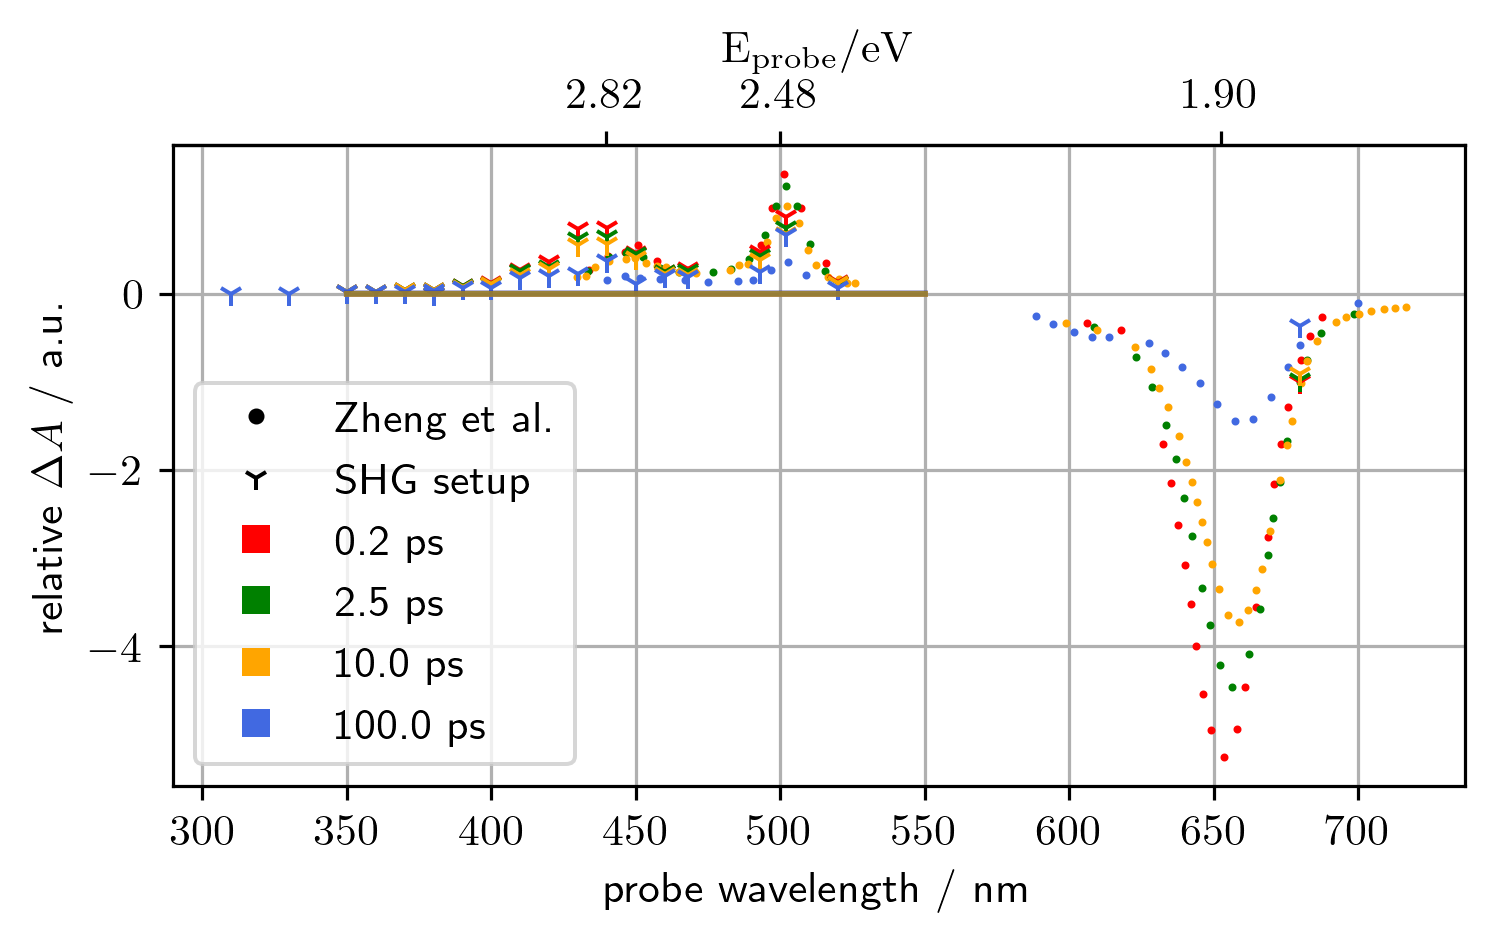

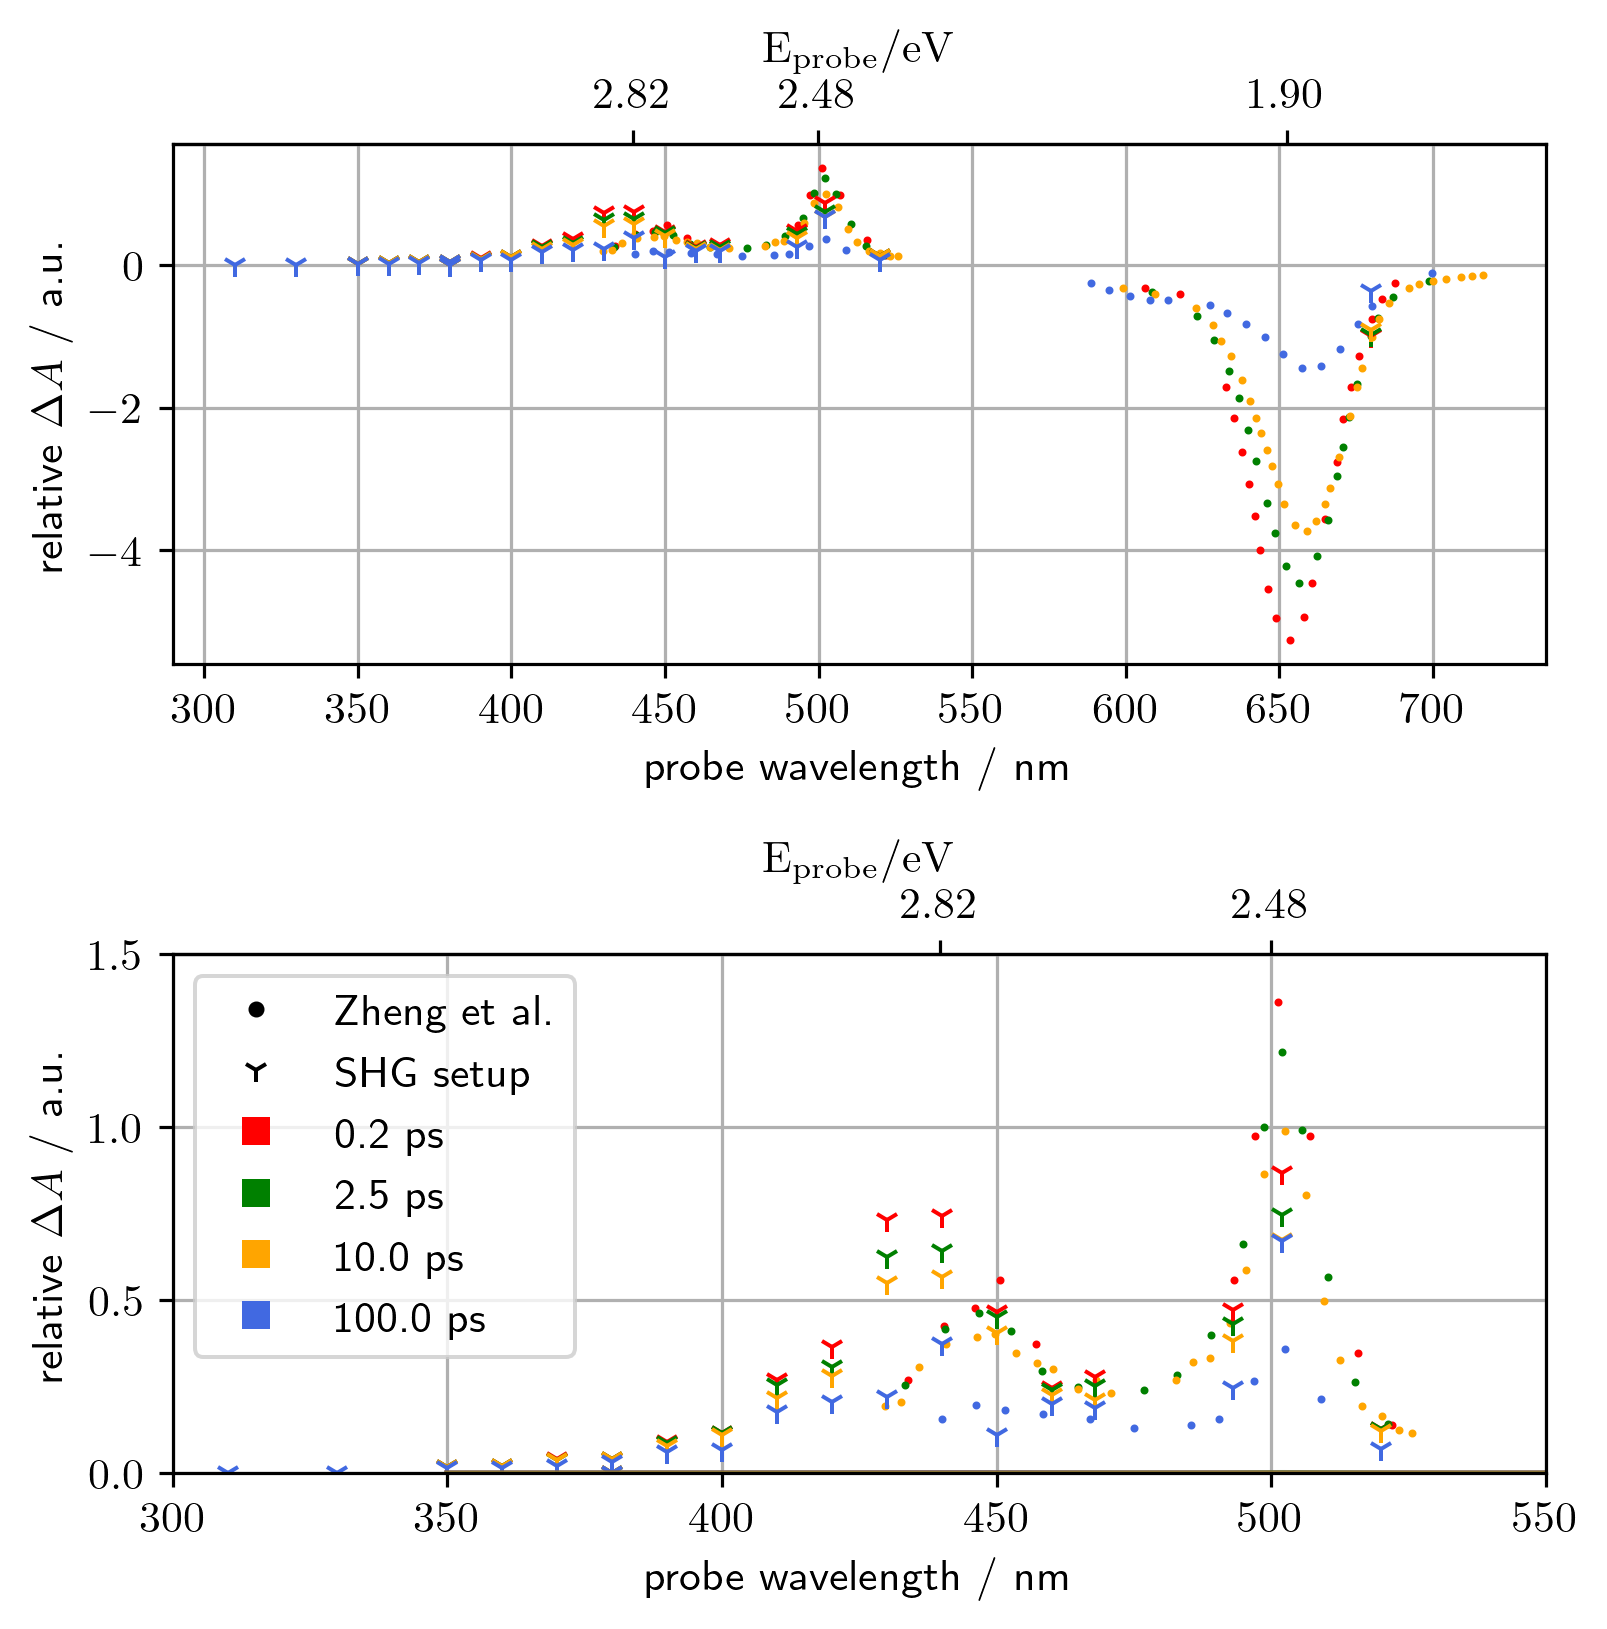

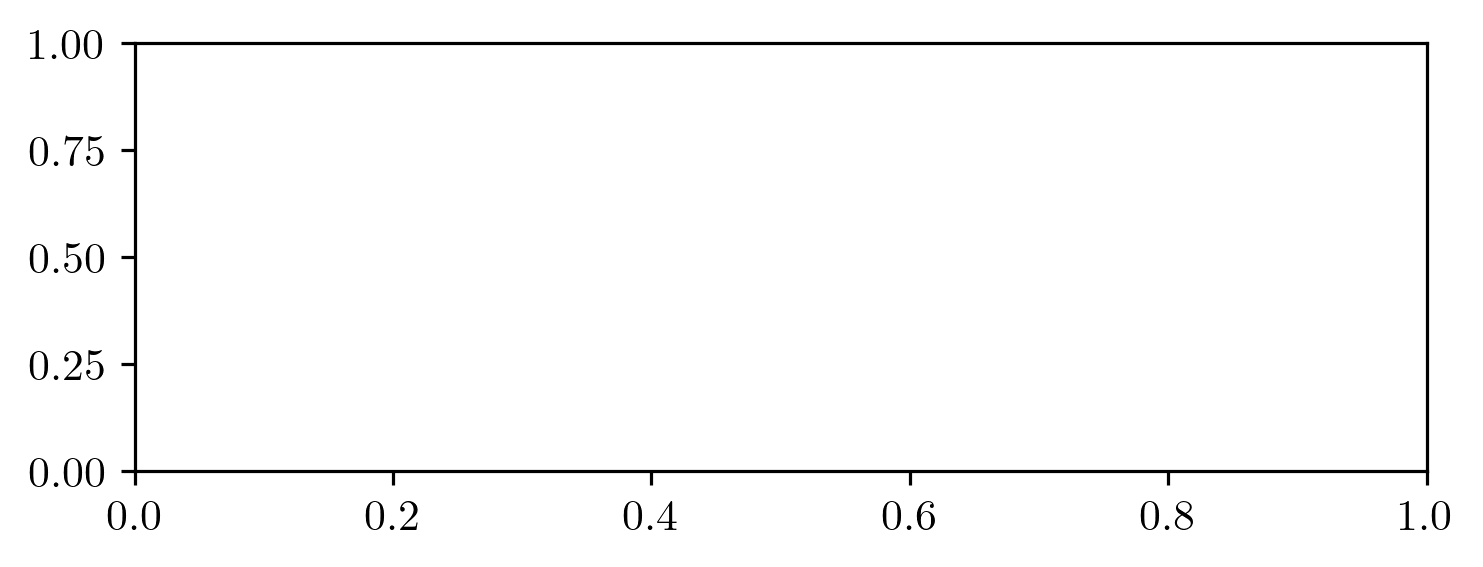

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.constants as const
import plotHelperLatex
plotHelperLatex.setMatplotSettings()

#copied from above
def wavToEnergy(lamb):
    #Energy in eV, lamb in nm
    return const.h*const.c/lamb*1e9/const.elementary_charge

def energyToWav(E):
    #Energy in eV, lamb in nm
    return const.h*const.c/E*1e9/const.elementary_charge


def paramDictatTime(param_dict, time_fs):
    return param_dict['A1']*np.exp(-time_fs/param_dict['tau1']) + param_dict['A2']*np.exp(-time_fs/param_dict['tau2'])
#import data from excel (terrible choice I know, but I want the visualisation and comparability)

def ErrorCorrectionConvoluted(signal, correctionFactor, peakRadiance, dRelUmPerPx, dRelPower):
    '''correctionfactor is already divided with peak radiance\\
    dRelPower = dPower/Power'''
    dPeakRadiance = dRelPower*peakRadiance + 2*peakRadiance*dRelUmPerPx
    return abs(signal*correctionFactor/peakRadiance*dPeakRadiance)

def fitPeaks(x_data, y_data, N_gaussians, centers = [], sigma = [], amplitudes = [], positionBounds = [], function = None):
    from scipy.optimize import curve_fit
    startParameters = np.ones(3*N_gaussians)
    min_bounds = []
    max_bounds = []
    if len(centers) != N_gaussians:
        centers = np.linspace(min(x_data), max(x_data),N_gaussians)
    
    if len(amplitudes) != N_gaussians:
        amplitudes = max(np.abs(y_data))/N_gaussians*np.ones(N_gaussians)
    if len(sigma) != N_gaussians:
        sigma = np.ones(N_gaussians)*0.01

    for i in range(N_gaussians):
        startParameters[i*3+1] = sigma[i]
        startParameters[i*3] = centers[i]
        startParameters[i*3+2] = amplitudes[i]

    for i in range(N_gaussians):
        if len(positionBounds) == 0:
            min_bounds.append(min(x_data))
            max_bounds.append(max(x_data))
        else:
            min_bounds.append(positionBounds[i][0])
            max_bounds.append(positionBounds[i][1])
        min_bounds.append(0)
        max_bounds.append(np.inf)
        min_bounds.append(-np.inf)
        max_bounds.append(np.inf)
    par_bounds = [tuple(min_bounds), tuple(max_bounds)]

    if function == None:
        function = multiGaussianAdditive

    popt, pcov = curve_fit(function, x_data, y_data, 
            p0 = startParameters, 
            bounds = par_bounds,
            method="trf")
    return popt, pcov

def multiLorentzianAdditive(x_data, *parameters):
    r'''parameters are parameters[number of gaussian, center/gamma/amplitude]'''
    y_out = np.zeros(np.shape(x_data))
    for cauchyInd in range(0,len(parameters),3):
        #y_out += 1/(np.pi*parameters[cauchyInd+1]*(1+np.power((x_data-parameters[cauchyInd])/parameters[cauchyInd+1],2)))
        #removing normalisation constant, want it to be 1 in center position
        y_out += parameters[cauchyInd+2]/((1+np.power((x_data-parameters[cauchyInd])/parameters[cauchyInd+1],2)))
    return y_out

excel_path = r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\CorrectedPump653ProbeWavelengthScan_UV-extended.xlsx"
SHG_wav_timescan = pd.read_excel(excel_path, sheet_name = "2024WavelengthScanParameters", skiprows=[0,1])
SHG_main = pd.read_excel(excel_path, sheet_name='2024WavelengthScan', skiprows=[0,1])
#print(SHG_main)
#print(SHG_main.keys())


wavelengths = SHG_main['Probe wavelength / nm']
#simple correction without map
dOD_SHG_main = SHG_main['cor_dOD / (mOD*m^2/W)']
#correction with map
dOD_SHG_mapCorr = SHG_main['hypothetical correction']
dOD_map_reference = abs(SHG_main['mapReference'])
dPumpPower = SHG_main['dRelPumpPower']
peakRad = SHG_main['Pump power density / (W/m^2)']


scan_wavs = SHG_wav_timescan['Probe wavelength / nm']
scan_corrFactors = SHG_wav_timescan['Correction Factor / (W/m^2)^-1']
scan_params = {
    'A1' : SHG_wav_timescan['A1'],
    'A2' : SHG_wav_timescan['A2'],
    'tau1' : SHG_wav_timescan['tau1'],
    'tau2' : SHG_wav_timescan['tau2'],
}


#high res zheng

zheng_high_res_path = r"C:\Users\M\Documents\Books\masterprojectinformation\images\Zheng2020_higherPrecisionRip.csv"
Zheng = pd.read_csv(zheng_high_res_path, sep=",")

ZhengDict = {}
ZhengDict['200fs'] = np.array([Zheng["0.2 ps"][1:], Zheng["Y0.2 ps"][1:]], dtype=float)
ZhengDict['2500fs'] = np.array([Zheng["2.5 ps"][1:], Zheng["Y2.5 ps"][1:]], dtype=float)
ZhengDict['10ps'] = np.array([Zheng["10 ps"][1:], Zheng["Y10 ps"][1:]], dtype=float)
ZhengDict['100ps'] = np.array([Zheng["100 ps"][1:], Zheng["Y100 ps"][1:]], dtype=float)
#print(np.array(ZhengDict["2500fs"][0,:],dtype=int))
#print(np.array(ZhengDict["2500fs"][0,:],dtype=int) == 680)
ZhengModifier = abs(ZhengDict["2500fs"][1,np.array(ZhengDict["2500fs"][0,:],dtype=int) == 679])

fig, axs = plt.subplots(1,1, figsize = plotHelperLatex.figSizer(1,2), dpi=288)
figc, axc = plt.subplots(2,1, figsize = plotHelperLatex.figSizer(1,1), dpi=288)

times = [2e2, 2.5e3, 1e4, 1e5]
colors = ['red', 'green', 'orange', 'royalblue']

indexMeasureModifier = np.array(scan_wavs, int) == 680
modifier_scan_params = {
    'A1' : SHG_wav_timescan['A1'][indexMeasureModifier],
    'A2' : SHG_wav_timescan['A2'][indexMeasureModifier],
    'tau1' : SHG_wav_timescan['tau1'][indexMeasureModifier],
    'tau2' : SHG_wav_timescan['tau2'][indexMeasureModifier],
}


measurementModifier = abs(scan_corrFactors*dOD_map_reference[indexMeasureModifier]*paramDictatTime(modifier_scan_params, times[0]))[0]
#print((dOD_map_reference[indexMeasureModifier]*paramDictatTime(scan_params, time))[0])
if True:
    sizeM = 2
    for ind, key in enumerate(ZhengDict):
        axs.plot(ZhengDict[key][0,:], ZhengDict[key][1,:]/ZhengModifier, linestyle="None", marker = ".", markersize= sizeM, color=colors[ind])
        axc[0].plot(ZhengDict[key][0,:], ZhengDict[key][1,:]/ZhengModifier, linestyle="None", marker = ".", markersize= sizeM, color=colors[ind])
        axc[1].plot(ZhengDict[key][0,:], ZhengDict[key][1,:]/ZhengModifier, linestyle="None", marker = ".", markersize= sizeM, color=colors[ind])
else:
    sizeM = 1
    for ind, key in enumerate(ZhengDict):
        axs.plot(ZhengDict[key][0,:], ZhengDict[key][1,:]/ZhengModifier, linestyle="-", linewidth = sizeM, marker = "None", color=colors[ind])
        axc[0].plot(ZhengDict[key][0,:], ZhengDict[key][1,:]/ZhengModifier, linestyle="-", linewidth = sizeM,  marker = "None", color=colors[ind])
        axc[1].plot(ZhengDict[key][0,:], ZhengDict[key][1,:]/ZhengModifier, linestyle="-", linewidth = sizeM,  marker = "None", color=colors[ind])

for ind, time in enumerate(times):
    tempVal = scan_corrFactors*dOD_map_reference*paramDictatTime(scan_params, time)/measurementModifier

    axs.plot(scan_wavs, tempVal, '1', color = colors[ind], label="%.1f ps" %(time*1e-3))
    axc[0].plot(scan_wavs, tempVal, '1', color = colors[ind], label="%.1f ps" %(time*1e-3))
    axc[1].plot(scan_wavs, tempVal, '1', color = colors[ind], label="%.1f ps" %(time*1e-3))
#plotting 310 and 330 by hand
axs.plot([310, 330], [0,0], '1', color = colors[-1], label="%.1f ps" %(times[-1]*1e-3))
axc[0].plot([310, 330], [0,0], '1', color = colors[-1], label="%.1f ps" %(times[-1]*1e-3))
axc[1].plot([310, 330], [0,0], '1', color = colors[-1], label="%.1f ps" %(times[-1]*1e-3))

#############plot the fitting of with cauchy functions##############################
y_dataFit = scan_corrFactors*dOD_map_reference*paramDictatTime(scan_params, times[0])/measurementModifier
y_dataFit = y_dataFit[1:-2]
wav_dataFit = scan_wavs[1:-2]
#do nan-check
#nanBool = np.isnan(y_dataFit)


wav_range = np.linspace(350,550,500)
axs.plot(wav_range, multiLorentzianAdditive(wavToEnergy(wav_range), *signalFit), label=r"$\sum$ fits", alpha=0.5,linestyle="-", color = "m")
axc[1].plot(wav_range, multiLorentzianAdditive(wavToEnergy(wav_range), *signalFit), label=r"$\sum$ fits", alpha=0.5,linestyle="-", color = "m")
color_fits = ["blue", "green", "orange"]
for i in range(0,len(signalFit),3):
    #break
    axs.plot(wav_range, multiLorentzianAdditive(wavToEnergy(wav_range), *signalFit[i:i+3]), label="fit "+str(int(i/3)), alpha=0.5,linestyle="-", color = color_fits[int(i/3)])
    axc[1].plot(wav_range, multiLorentzianAdditive(wavToEnergy(wav_range), *signalFit[i:i+3]), label="fit "+str(int(i/3)), alpha=0.5,linestyle="-", color = color_fits[int(i/3)])


secax = axs.secondary_xaxis('top', functions=(wavToEnergy, energyToWav))
secax.set_xticks(np.round(wavToEnergy(np.array([440, 500, 653])), 2))
secax.set_xlabel(r"$\mathrm{E_{probe} / eV}$")




axs.set_xlabel('probe wavelength / nm')
axs.set_ylabel(r'relative $\Delta A$ / a.u.')
axs.grid(True)



#custom legend
from matplotlib.lines import Line2D
legend_items = [Line2D([0], [0], color = "black", label="Zheng et al.", marker=".", linestyle="None"),
                Line2D([0], [0], color = "black", label="SHG setup", marker="1",linestyle="None")]
for ind in range(len(times)):
    legend_items.append(Line2D([0], [0], color = colors[ind], label="%.1f ps" %(times[ind]*1e-3), marker="s", linestyle="None"))

#introduce cauchy fits to legend
#legend_items.append(Line2D([0], [0], label=r"$\sum$ fits", linestyle="-", alpha=0.5, color = "m"))
for l2d in range(3):
    break
    legend_items.append(Line2D([0], [0], label="fit "+str(int(l2d)), linestyle="-", alpha=0.5, color = color_fits[l2d]))
axs.legend(handles=legend_items)


for i in range(2):
    secax2 = axc[i].secondary_xaxis('top', functions=(wavToEnergy, energyToWav))
    secax2.set_xticks(np.round(wavToEnergy(np.array([440, 500, 653])), 2))
    secax2.set_xlabel(r"$\mathrm{E_{probe} / eV}$")
    axc[i].set_xlabel('probe wavelength / nm')
    axc[i].set_ylabel(r'relative $\Delta A$ / a.u.')
    #axc[i].legend(handles=legend_items)
    axc[i].grid(visible=True)
axc[1].legend(handles=legend_items)
#axs.set_ylim((0,1.5))
#axs.set_xlim((300, 550))
axc[1].set_xlim((300,550))
axc[1].set_ylim((0,1.5))

#plt.grid(True)
#plt.show()
plt.tight_layout()

#attempt the alternative moving mean at a width of 10 nm aka +- 5 nm
gaussian = lambda wavs, centerwav: 1/np.sqrt(2*np.pi)/5*np.exp(-(centerwav-wavs)**2/(2*5**2))
ZhengOurWavelengths = np.zeros((len(ZhengDict.keys()), len(wavelengths)))
for wav_ind, wav in enumerate(wavelengths):
    for key_ind, key in enumerate(ZhengDict.keys()):
        #print(key)
        wav_bool_array = (wav- 30< ZhengDict[key][0,:]) & (wav +30 > ZhengDict[key][0,:])
        #bool_array = (delays[indWav,:] > plotDelay[indDelay]) & (delays[indWav,:] < plotDelay[indDelay] + 1e3/(n_subticks))
        #ZhengOurWavelengths[key_ind, wav_ind] = np.sum(ZhengDict[key][1,wav_bool_array])
        ZhengOurWavelengths[key_ind, wav_ind] = np.sum(gaussian(ZhengDict[key][0,wav_bool_array], wav)*ZhengDict[key][1,wav_bool_array])
        #print(gaussian(ZhengDict[key][0,:], wav)*ZhengDict[key][1,:])
"""
ax2.plot(wavelengths, scan_corrFactors*dOD_map_reference*paramDictatTime(scan_params, 2e2)/measurementModifier, linestyle="None", marker="1", color='r')

time_ind = 2
ax2.plot(wavelengths, ZhengOurWavelengths[time_ind]/abs(ZhengOurWavelengths[0,indexMeasureModifier]), linestyle="None", marker=".")
ax2.plot(ZhengDict["200fs"][0,:], ZhengDict["200fs"][1,:]/ZhengModifier, linestyle="None", marker = ".", color=colors[ind])"""
#second plot --- plotting 2.5 ps signal
#fig2, ax2 = plt.subplots(1,1,figsize=plotHelperLatex.figSizer(1,3), dpi=288)



In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.constants as const
import plotHelperLatex
plotHelperLatex.setMatplotSettings()

#copied from above
def wavToEnergy(lamb):
    #Energy in eV, lamb in nm
    return const.h*const.c/lamb*1e9/const.elementary_charge

def energyToWav(E):
    #Energy in eV, lamb in nm
    return const.h*const.c/E*1e9/const.elementary_charge


def paramDictatTime(param_dict, time_fs):
    return param_dict['A1']*np.exp(-time_fs/param_dict['tau1']) + param_dict['A2']*np.exp(-time_fs/param_dict['tau2'])
#import data from excel (terrible choice I know, but I want the visualisation and comparability)

def ErrorCorrectionConvoluted(signal, correctionFactor, peakRadiance, dRelUmPerPx, dRelPower):
    '''correctionfactor is already divided with peak radiance\\
    dRelPower = dPower/Power'''
    dPeakRadiance = dRelPower*peakRadiance + 2*peakRadiance*dRelUmPerPx
    return abs(signal*correctionFactor/peakRadiance*dPeakRadiance)

def fitPeaks(x_data, y_data, N_gaussians, centers = [], sigma = [], amplitudes = [], positionBounds = [], ampBounds = [], sigBounds = [], function = None):
    from scipy.optimize import curve_fit
    startParameters = np.ones(3*N_gaussians)
    min_bounds = []
    max_bounds = []
    if len(centers) != N_gaussians:
        centers = np.linspace(min(x_data), max(x_data),N_gaussians)
    
    if len(amplitudes) != N_gaussians:
        amplitudes = max(np.abs(y_data))/N_gaussians*np.ones(N_gaussians)
    if len(sigma) != N_gaussians:
        sigma = np.ones(N_gaussians)*0.01

    for i in range(N_gaussians):
        startParameters[i*3+1] = sigma[i]
        startParameters[i*3] = centers[i]
        startParameters[i*3+2] = amplitudes[i]

    for i in range(N_gaussians):
        if len(positionBounds) == 0:
            min_bounds.append(min(x_data))
            max_bounds.append(max(x_data))
        else:
            min_bounds.append(positionBounds[i][0])
            max_bounds.append(positionBounds[i][1])
        if len(sigBounds)==0:
            min_bounds.append(0)
            max_bounds.append(np.inf)
        else:
            min_bounds.append(sigBounds[i][0])
            max_bounds.append(sigBounds[i][1])
        if len(ampBounds) == 0:
            min_bounds.append(-np.inf)
            max_bounds.append(np.inf)
        else:
            min_bounds.append(ampBounds[0])
            max_bounds.append(ampBounds[1])
    par_bounds = [tuple(min_bounds), tuple(max_bounds)]


    popt, pcov = curve_fit(function, x_data, y_data, 
            p0 = startParameters, 
            bounds = par_bounds,
            method="trf")
    return popt, pcov

def multiLorentzianAdditive(x_data, *parameters):
    r'''parameters are parameters[number of gaussian, center/gamma/amplitude]'''
    y_out = np.zeros(np.shape(x_data))
    for cauchyInd in range(0,len(parameters),3):
        #y_out += 1/(np.pi*parameters[cauchyInd+1]*(1+np.power((x_data-parameters[cauchyInd])/parameters[cauchyInd+1],2)))
        #removing normalisation constant, want it to be 1 in center position
        y_out += parameters[cauchyInd+2]/((1+np.power((x_data-parameters[cauchyInd])/parameters[cauchyInd+1],2)))
    return y_out

def multiGaussianAdditive(x_data, *parameters):
    r'''parameters are parameters[number of gaussian, center/sig/amplitude]'''
    y_out = np.zeros(np.shape(x_data))
    for gaussInd in range(0,len(parameters),3):
        y_out += parameters[gaussInd+2]*np.exp(-np.power(x_data-parameters[gaussInd+0], 2)/(2*np.power(parameters[gaussInd+1],2)))
    return y_out

excel_path = r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\CorrectedPump653ProbeWavelengthScan_UV-extended.xlsx"
SHG_wav_timescan = pd.read_excel(excel_path, sheet_name = "2024WavelengthScanParameters", skiprows=[0,1])
SHG_main = pd.read_excel(excel_path, sheet_name='2024WavelengthScan', skiprows=[0,1])
#print(SHG_main)
#print(SHG_main.keys())


wavelengths = SHG_main['Probe wavelength / nm']
#simple correction without map
dOD_SHG_main = SHG_main['cor_dOD / (mOD*m^2/W)']
#correction with map
dOD_SHG_mapCorr = SHG_main['hypothetical correction']
dOD_map_reference = abs(SHG_main['mapReference'])
dPumpPower = SHG_main['dRelPumpPower']
peakRad = SHG_main['Pump power density / (W/m^2)']


scan_wavs = SHG_wav_timescan['Probe wavelength / nm']
scan_corrFactors = SHG_wav_timescan['Correction Factor / (W/m^2)^-1']
scan_params = {
    'A1' : SHG_wav_timescan['A1'],
    'A2' : SHG_wav_timescan['A2'],
    'tau1' : SHG_wav_timescan['tau1'],
    'tau2' : SHG_wav_timescan['tau2'],
}

scan_corrFactors[7] = np.nan
#high res zheng

zheng_high_res_path = r"C:\Users\M\Documents\Books\masterprojectinformation\images\Zheng2020_higherPrecisionRip.csv"
Zheng = pd.read_csv(zheng_high_res_path, sep=",")

ZhengDict = {}
ZhengDict['200fs'] = np.array([Zheng["0.2 ps"][1:], Zheng["Y0.2 ps"][1:]], dtype=float)
ZhengDict['2500fs'] = np.array([Zheng["2.5 ps"][1:], Zheng["Y2.5 ps"][1:]], dtype=float)
ZhengDict['10ps'] = np.array([Zheng["10 ps"][1:], Zheng["Y10 ps"][1:]], dtype=float)
ZhengDict['100ps'] = np.array([Zheng["100 ps"][1:], Zheng["Y100 ps"][1:]], dtype=float)
#print(np.array(ZhengDict["2500fs"][0,:],dtype=int))
#print(np.array(ZhengDict["2500fs"][0,:],dtype=int) == 680)
ZhengModifier = abs(ZhengDict["2500fs"][1,np.array(ZhengDict["2500fs"][0,:],dtype=int) == 679])

fig, axs = plt.subplots(1,1, figsize = plotHelperLatex.figSizer(1,2), dpi=288)
#figc, axc = plt.subplots(2,1, figsize = plotHelperLatex.figSizer(1, 1.4), dpi=288)

#times = [2e2, 2.5e3, 1e4, 1e5]
times = [10e3]
colors = ['red', 'green', 'orange', 'royalblue']

indexMeasureModifier = np.array(scan_wavs, int) == 680
modifier_scan_params = {
    'A1' : SHG_wav_timescan['A1'][indexMeasureModifier],
    'A2' : SHG_wav_timescan['A2'][indexMeasureModifier],
    'tau1' : SHG_wav_timescan['tau1'][indexMeasureModifier],
    'tau2' : SHG_wav_timescan['tau2'][indexMeasureModifier],
}
ZhengRefSig = np.array(Zheng["Y10 ps"][1:], dtype=float)
ZhengRefWav = np.array(Zheng["10 ps"][1:], dtype=float)
bool_mask = np.invert(np.isnan(ZhengRefSig))
ZhengRefSig = np.array(ZhengRefSig[bool_mask])
ZhengRefWav = ZhengRefWav[bool_mask]

measurementModifier = abs(scan_corrFactors*dOD_map_reference[indexMeasureModifier]*paramDictatTime(modifier_scan_params, times[0]))[0]
#print((dOD_map_reference[indexMeasureModifier]*paramDictatTime(scan_params, time))[0])


zhengFit, zhengCov = fitPeaks(wavToEnergy(ZhengRefWav), ZhengRefSig/ZhengModifier,2, [2.5, 2.75], [0.1,0.1], [1, 1], positionBounds=[[2, 3], [2, 3]], function=multiLorentzianAdditive, sigBounds=[[0.02,0.9], [0.1,np.inf]], ampBounds=[0.4, 2])
#zhengFit, zhengCov = fitPeaks(wavToEnergy(ZhengRefWav), ZhengRefSig/ZhengModifier,2, [2.82, 2.48], [0.2,0.05], [0.35, 0.7], positionBounds=[[2.76, 2.83], [2.3, 2.7]], function=multiGaussianAdditive)
print(zhengFit)

axs.plot(ZhengRefWav, ZhengRefSig/ZhengModifier, linestyle="None", marker = ".", markersize= 2, color="r")



for ind, time in enumerate(times):
    axs.plot(scan_wavs, scan_corrFactors*dOD_map_reference*paramDictatTime(scan_params, time)/measurementModifier, '1', color = "b", label="%.1f ps" %(time*1e-3))

#plotting 310 and 330 by hand
axs.plot([310, 330], [0,0], '1', color = "b")


#############plot the fitting of with cauchy functions##############################
y_dataFit = scan_corrFactors*dOD_map_reference*paramDictatTime(scan_params, times[0])/measurementModifier
y_dataFit = y_dataFit[1:-2]
wav_dataFit = scan_wavs[1:-2]
#get rid of nan
bool_mask = np.invert(np.isnan(y_dataFit))
y_dataFit = np.array(y_dataFit[bool_mask])
wav_dataFit = wav_dataFit[bool_mask]

signalFit, signalCov = fitPeaks(wavToEnergy(wav_dataFit), y_dataFit, 3, [2.75, 2.48, 3.15], [0.1,0.04, 0.02], [0.5, 0.5, 0.1], positionBounds=[[2.74, 2.83], [2.3, 2.7], [3.015,3.60]], function=multiLorentzianAdditive, ampBounds=[0,np.inf])


wav_range = np.linspace(350,550,500)
axs.plot(wav_range, multiLorentzianAdditive(wavToEnergy(wav_range), *signalFit), label=r"$\sum$ fits", alpha=0.5,linestyle="-", color = "b")
axs.plot(wav_range, multiLorentzianAdditive(wavToEnergy(wav_range), *zhengFit), label=r"$\sum$ fits", alpha=0.5,linestyle="-", color = "r")
#axs.plot(wav_range, multiGaussianAdditive(wavToEnergy(wav_range), *zhengFit), label=r"$\sum$ fits", alpha=0.5,linestyle="-", color = "r")
color_fits = ["blue", "green", "purple"]
for i in range(0,len(signalFit),3):
    #break
    axs.plot(wav_range, multiLorentzianAdditive(wavToEnergy(wav_range), *signalFit[i:i+3]), label="fit "+str(int(i/3)), alpha=0.3,linestyle="--", color = "b")
for i in range(0,len(zhengFit),3):
    #axs.plot(wav_range, multiGaussianAdditive(wavToEnergy(wav_range), *zhengFit[i:i+3]), label="fit "+str(int(i/3)), alpha=0.3,linestyle="--", color = "r")
    axs.plot(wav_range, multiLorentzianAdditive(wavToEnergy(wav_range), *zhengFit[i:i+3]), label="fit "+str(int(i/3)), alpha=0.3,linestyle="--", color = "r")
secax = axs.secondary_xaxis('top', functions=(wavToEnergy, energyToWav))
secax.set_xticks(np.round(wavToEnergy(np.array([410,440, 500, 653])), 2))
secax.set_xlabel(r"$\mathrm{E_{probe} / eV}$")



axs.set_xlim((300,550))
axs.set_ylim((0,1.2))
axs.set_xlabel('probe wavelength / nm')
axs.set_ylabel(r'relative $\Delta A$ / a.u.')
axs.grid(True)

print(signalFit)

#custom legend
from matplotlib.lines import Line2D
legend_single = [Line2D([0], [0], color = "r", label="Zheng et al.", marker=".", linestyle="None"),
                    Line2D([0], [0], color = "r", label=r"Zheng $\sum$ fits", marker="None",linestyle="-", alpha=0.5),
                    Line2D([0], [0], color = "r", label=r"Zheng fits", marker="None",linestyle="--", alpha=0.3),
                    Line2D([0], [0], color = "b", label="SHG setup", marker="1",linestyle="None"), 
                    Line2D([0], [0], color = "b", label=r"SHG $\sum$ fits", marker="None",linestyle="-", alpha=0.5),
                    Line2D([0], [0], color = "b", label=r"SHG fits", marker="None",linestyle="--", alpha=0.3)]

axs.legend(handles=legend_single)
legend_itemsZheng = [Line2D([0], [0], color = "r", label=" 2.5 ps Zheng et al.", marker=".", linestyle="None")]
legend_itemsSHG = [Line2D([0], [0], color = "r", label="2.5 ps SHG setup", marker="1",linestyle="None")]
for ind in range(len(times)):
    break
    legend_items.append(Line2D([0], [0], color = colors[ind], label="%.1f ps" %(times[ind]*1e-3), marker="s", linestyle="None"))

#introduce cauchy fits to legend
legend_itemsZheng.append(Line2D([0], [0], label=r"$\sum$ fits", linestyle="-", alpha=0.5, color = "m"))
legend_itemsSHG.append(Line2D([0], [0], label=r"$\sum$ fits", linestyle="-", alpha=0.5, color = "m"))
for l2d in range(3):
    #break
    legend_itemsSHG.append(Line2D([0], [0], label="fit "+str(int(l2d)), linestyle="-", alpha=0.5, color = color_fits[l2d]))
    if l2d < 2:
        legend_itemsZheng.append(Line2D([0], [0], label="fit "+str(int(l2d)), linestyle="-", alpha=0.5, color = color_fits[l2d]))
#axs.legend(handles=legend_items)



#plt.grid(True)
#plt.show()
plt.tight_layout()


In [ ]:
#this here is supposed to show 'raw' data over wavelength
#copied most from above
import pandas as pd
from matplotlib import pyplot as plt
from scipy import constants as const
import numpy as np
import plotHelperLatex
plotHelperLatex.setMatplotSettings()
import fileParsingMethods
import SeriesDegradation
import json

umPerPx = 6.949
dumPerPx = 4E-2
dRelUmPerPx = dumPerPx/umPerPx

def wavToEnergy(lamb):
    #Energy in eV, lamb in nm
    return const.h*const.c/lamb*1e9/const.elementary_charge

def energyToWav(E):
    #Energy in eV, lamb in nm
    return const.h*const.c/E*1e9/const.elementary_charge

def paramDictatTime(param_dict, time_fs):
    return param_dict['A1']*np.exp(-time_fs/param_dict['tau1']) + param_dict['A2']*np.exp(-time_fs/param_dict['tau2'])
#import data from excel (terrible choice I know, but I want the visualisation and comparability)

def ErrorCorrectionConvoluted(signal, correctionFactor, peakRadiance, dRelUmPerPx, dRelPower):
    '''correctionfactor is already divided with peak radiance\\
    dRelPower = dPower/Power'''
    dPeakRadiance = dRelPower*peakRadiance + 2*peakRadiance*dRelUmPerPx
    return abs(signal*correctionFactor/peakRadiance*dPeakRadiance)

#doing this manually because I hate myself, but not enough to automate it
#[directory, filename, fitJSON for t0]
filePaths = []
#STD
filePaths.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\STD-680", r"saturation_2024-01-16_14-09.mat",  r"TAfitPump653Probe680_DecayCorrected.JSON", r"SummaryPump653Probe680.JSON"])
filePaths.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\STD-520", r"saturation_2024-01-16_15-21.mat",  r"TAfitPump653Probe520_DecayCorrected.JSON", r"SummaryPump653Probe520.JSON"])
filePaths.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\STD-502", r"saturation_2024-01-16_14-51.mat",  r"TAfitPump653Probe502_DecayCorrected.JSON", r"SummaryPump653Probe502.JSON"])
filePaths.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\STD-493", r"saturation_2024-01-19_14-24.mat",  r"TAfitPump653Probe493_DecayCorrected.JSON", r"SummaryPump653Probe493Caution.JSON"])
#SHG
filePaths.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-468", r"saturation_2024-01-16_18-38.mat",  r"TAfitPump653Probe468_DecayCorrected.JSON", r"SummaryPump653Probe468.JSON"])
filePaths.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-460", r"saturation_2024-01-18_17-34.mat",  r"TAfitPump653Probe460_DecayCorrected.JSON", r"SummaryPump653Probe460Caution.JSON"])
filePaths.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-450", r"saturation_2024-01-18_11-28.mat",  r"TAfitPump653Probe450_DecayCorrected.JSON", r"SummaryPump653Probe450.JSON"])
filePaths.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-440", r"saturation_2024-01-16_19-07.mat",  r"TAfitPump653Probe440_DecayCorrected.JSON", r"SummaryPump653Probe440.JSON"])
filePaths.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-430", r"saturation_2024-01-18_10-52.mat",  r"TAfitPump653Probe430_DecayCorrected.JSON", r"SummaryPump653Probe430.JSON"])
filePaths.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-420", r"saturation_2024-01-17_14-46.mat",  r"TAfitPump653Probe420_DecayCorrected.JSON", r"SummaryPump653Probe420.JSON"])
filePaths.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-410", r"saturation_2024-01-19_13-41.mat",  r"TAfitPump653Probe410_DecayCorrected.JSON", r"SummaryPump653Probe410Caution.JSON"])
filePaths.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-400", r"saturation_2024-01-17_15-26.mat",  r"TAfitPump653Probe400_DecayCorrected.JSON", r"SummaryPump653Probe400.JSON"])
filePaths.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-390", r"saturation_2024-01-18_12-03.mat",  r"TAfitPump653Probe390_DecayCorrected.JSON", r"SummaryPump653Probe390.JSON"])
filePaths.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-380", r"saturation_2024-01-17_16-31.mat",  r"TAfitPump653Probe380_2_DecayCorrected.JSON", r"SummaryPump653Probe380_2.JSON"])
filePaths.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-370", r"saturation_2024-01-17_17-11.mat",  r"TAfitPump653Probe370_DecayCorrected.JSON", r"SummaryPump653Probe370.JSON"])
filePaths.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-360", r"saturation_2024-01-18_15-50.mat",  r"TAfitPump653Probe360_DecayCorrected.JSON", r"SummaryPump653Probe360_2.JSON"])
filePaths.append([r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-350", r"saturation_2024-01-18_16-39.mat",  r"TAfitPump653Probe350_DecayCorrected.JSON", r"SummaryPump653Probe350.JSON"])

#import map correction
excel_path = r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\CorrectedPump653ProbeWavelengthScan_UV-extended.xlsx"
SHG_main = pd.read_excel(excel_path, sheet_name='2024WavelengthScan', skiprows=[0,1], usecols=["Probe wavelength / nm", "mapReference"])

SHG_main = SHG_main.sort_values(by="Probe wavelength / nm", ascending=False)
SHG_main.drop_duplicates()
SHG_main= SHG_main[:-2]
#print(SHG_main)
def updateFitJSON(fitJSONpath,summaryJSONpath, referencePower, referenceDecay):
    #beware this only works for single entries
    fitJSONfile = open(fitJSONpath)
    fitJSON = json.load(fitJSONfile)
    fitJSONfile.close()
    sumJSONfile = open(summaryJSONpath)
    sumJSON = json.load(sumJSONfile)
    sumJSONfile.close()
    ownPower = sumJSON["Pump power density: W/m^2"]
    fitJSON["entries"][0]["degradePowerRatio"] = ownPower/referencePower
    fitJSON["entries"][0]["tauExpDegrade"] = referenceDecay
    #print(fitJSON)
    fitJSONfile = open(fitJSONpath, 'w')
    json.dump(fitJSON,fitJSONfile)
    fitJSONfile.truncate()
    fitJSONfile.close()




dOD_map_reference = SHG_main["mapReference"]
dOD_map_reference = abs(dOD_map_reference/np.mean(dOD_map_reference))
pRatioReference = 1575
#now grab the data, correct/background substract it it and stuff it into an array as a mean
wav_vec = [680, 520, 502, 493, 468, 460, 450, 440, 430, 420, 410, 400, 390, 380, 370, 360, 350]
bgLen = np.ones(np.shape(wav_vec), dtype=int)*25
#the linear background ones need more precise backgroundlengths
bgLen[[0,1,2,6,8]] = [40, 30, 25, 35, 35]
data_raw = []
delays = []
t0 = []
for ind, path_list in enumerate(filePaths):
    #load json with data needed
    #overlap JSON
    json_file = open(path_list[0] + r"\\"[0] + path_list[3])
    overlapCorrection = json.load(json_file)["Correction Factor: per W/m^2 pump power"]
    #fit JSON
    #update if needed first
    #updateFitJSON(path_list[0] + r"\\"[0] + path_list[2], path_list[0] + r"\\"[0] + path_list[3], pRatioReference, 12600)
    json_file = open(path_list[0] + r"\\"[0] + path_list[2])
    temp_JSON = json.load(json_file)["entries"][0]

    
    #print(temp_JSON)
    if ('bgParam' in temp_JSON.keys()) and (temp_JSON['bgParam'][0] != 0):
        linBgBool = True
    else:
        linBgBool = False
    
    tempdata, _, degradeFactors, tempdelay, _ = SeriesDegradation.autoCompensation(path_list[1], dirPath = path_list[0], degConst = temp_JSON["tauExpDegrade"], p_ratio = temp_JSON["degradePowerRatio"], linearBg=linBgBool, backgroundMean=bgLen[ind])
    data_raw.append(np.mean(overlapCorrection*dOD_map_reference[ind]*tempdata*degradeFactors, axis = 0))
    t0.append(temp_JSON["startParameters"][0]["position"])
    #print(t0)
    delays.append(tempdelay- t0[ind])

delays = np.array(delays)
data_raw = np.array(data_raw)

#create my own average time delay with n steps per picosecond and calculate the average value for plotting
n_subticks = int(4)
plotDelay = np.linspace(-1e4, 3e4, 40*n_subticks)
plotData = np.zeros((len(wav_vec), len(plotDelay)))

for indWav in range(len(wav_vec)):
    '''
    for indDelay in range(len(plotDelay)):
        delay_boolArray = (delays[indWav,:] > plotDelay[indDelay]) & (delays[indWav,:] < plotDelay[indDelay] + 1e3/(n_subticks))
        #print(delay_boolArray)
        plotData[indWav,indDelay] = np.mean(data_raw[indWav, delay_boolArray], axis = None)
    '''
    #interpolate instead
    plotData[indWav, :] = np.interp(plotDelay, delays[indWav,:],data_raw[indWav, :])


#print(data_raw)
plotData = plotData/np.max(abs(plotData))
delayGrid, wavGrid = np.meshgrid(plotDelay, np.arange(0,len(wav_vec), 1))

fig, ax = plt.subplots(1,1, figsize=plotHelperLatex.figSizer(1), dpi=288)
map = ax.pcolor(delayGrid*1e-3, wavGrid, plotData, cmap="bwr", clim=(-1,+1))
#check out pcolormesh
#map = ax.pcolormesh(delayGrid*1e-3, wavGrid, plotData, cmap="bwr", clim=(-1,+1), shading ="gouraud")
fig.colorbar(map, ax = ax, label=r"relative $\Delta A$ / a.u.")
ax.set_yticks(np.arange(0,len(wav_vec), 1), wav_vec)
ax.set_ylabel('probe wavelength / nm')
ax.set_xlabel('delay / ps')
plt.show()


### Example fit

In [ ]:
#shows the fit with the delay scan for a wavelength
import json
import fileParsingMethods
import SeriesDegradation
import plotHelperLatex
plotHelperLatex.setMatplotSettings()
from matplotlib import pyplot as plt
import numpy as np
import sys 
sys.path.insert(1, r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm")
import ExponentialFunctions
#493 nm
#saturation file
data_file = r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\STD-493\saturation_2024-01-19_14-24.mat"
#fit file
fitJSON = r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\STD-493\TAfitPump653Probe493_DecayCorrected.JSON"
pRatio = 1502/1575
dOD, delay, _ = fileParsingMethods.parseSummaryFileToArray(data_file, absorbance=True, backgroundLen=25)
print(np.shape(dOD))
times = fileParsingMethods.parseTime(fileParsingMethods.getTimes(data_file))
correctionFactors = SeriesDegradation.degradationCompensation(14100, times, decaysteps=len(delay))

fitData = json.load(open(fitJSON))["entries"][0]
t_data = np.linspace(delay[0], delay[-1], 1000)
fitData = fitData['startParameters']
position = fitData[0]['position']
slope = fitData[0]['slope']
amplitudes = []
decays = []
for i in range(len(fitData)-1):
    amplitudes.append(fitData[i+1]['amplitude'])
    decays.append(fitData[i+1]['decay'])
amplitudes = np.array(amplitudes)
decays = np.array(decays)
y_data = ExponentialFunctions.universalExponentialEnumerable(t_data, position, slope, amplitudes, decays)

fig, ax = plt.subplots(1,1, figsize=plotHelperLatex.figSizer(1,2.5), dpi=288)
#ax.plot(delay*1e-3, np.mean(dOD, axis=0))
print(np.shape(delay))
ax.plot(delay*1e-3, np.mean(dOD*correctionFactors, axis=0), label = "data")
ax.plot(t_data*1e-3,y_data, linestyle="--", label="fit")
ax.set_ylabel(r'$\Delta A$ / mOD')
ax.set_xlabel(r't / ps')
ax.legend()
plt.show()


### Anisotropy 440

In [ ]:
#like example fit, but comparison of 440 orthogonal and parallel
import json
import fileParsingMethods
import SeriesDegradation
import plotHelperLatex
plotHelperLatex.setMatplotSettings()
from matplotlib import pyplot as plt
import numpy as np
import sys 
sys.path.insert(1, r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm")
import ExponentialFunctions
#440 nm
#parallel
#saturation file
data_fileParallel = r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-440\saturation_2024-01-16_19-07.mat"
#fit file
fitJSON_Parallel = r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-440\TAfitPump653Probe440_DecayCorrected.JSON"
pRatioParallel = 1489/1575
dOD_parallel, delay_parallel, _ = fileParsingMethods.parseSummaryFileToArray(data_fileParallel, absorbance=True, backgroundLen=30)
timesParallel = fileParsingMethods.parseTime(fileParsingMethods.getTimes(data_fileParallel))
correctionFactorsParallel = SeriesDegradation.degradationCompensation(12600, timesParallel, decaysteps=len(delay_parallel), powerDensities=pRatioParallel)

fitDataPar = json.load(open(fitJSON_Parallel))["entries"][0]
t_dataPar = np.linspace(delay_parallel[0], delay_parallel[-1], 1000)
fitDataPar = fitDataPar['startParameters']
positionPar = fitDataPar[0]['position']
slopePar = fitDataPar[0]['slope']
amplitudesPar = []
decaysPar = []
for i in range(len(fitDataPar)-1):
    amplitudesPar.append(fitDataPar[i+1]['amplitude'])
    decaysPar.append(fitDataPar[i+1]['decay'])
amplitudesPar = np.array(amplitudesPar)
decaysPar = np.array(decaysPar)

#orthogonal
#saturation file
data_fileOrth = r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-440\Orthogonal\saturation_2024-01-16_16-59.mat"
#fit file
fitJSON_Orth = r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-440\Orthogonal\TAfitPump653Probe440OrthPol_DecayCorrected.JSON"
pRatioOrth = 1523/1575
dOD_orth, delay_orth, _ = fileParsingMethods.parseSummaryFileToArray(data_fileOrth, absorbance=True, backgroundLen=30)
timesOrth = fileParsingMethods.parseTime(fileParsingMethods.getTimes(data_fileOrth))
correctionFactorsOrth = SeriesDegradation.degradationCompensation(12600, timesOrth, decaysteps=len(delay_orth), powerDensities=pRatioOrth)

fitDataOrth = json.load(open(fitJSON_Orth))["entries"][0]
t_dataOrth = np.linspace(delay_orth[0], delay_orth[-1], 1000)
fitDataOrth = fitDataOrth['startParameters']
positionOrth = fitDataOrth[0]['position']
slopeOrth = fitDataOrth[0]['slope']
amplitudesOrth = []
decaysOrth = []
for i in range(len(fitDataOrth)-1):
    amplitudesOrth.append(fitDataOrth[i+1]['amplitude'])
    decaysOrth.append(fitDataOrth[i+1]['decay'])
amplitudesOrth = np.array(amplitudesOrth)
decaysOrth = np.array(decaysOrth)
#y_data = ExponentialFunctions.universalExponentialEnumerable(t_data, position, slope, amplitudes, decays)



#let me try to do the perrin formula
r_anisotropy = lambda par, orth: (par-orth)/(par+2*orth)

#stitch together parallel and orth to be on the same delay setting
#taken from raw data plot above
#create my own average time delay with n steps per picosecond and calculate the average value for plotting
n_subticks = int(1)
plotDelay = np.linspace(-2e4, 4e4, 30*n_subticks)
plotData = np.zeros((2, len(plotDelay)))

correctedParallel = np.mean(dOD_parallel*correctionFactorsParallel, axis=0)
correctedOrth = np.mean(dOD_orth*correctionFactorsOrth, axis=0)

for indDelay in range(len(plotDelay)):
    delay_boolArray = (delay_orth[:]-positionOrth > plotDelay[indDelay]) & (delay_orth[:]-positionOrth < plotDelay[indDelay] + 1e3/(n_subticks))
    plotData[0,indDelay] = np.mean(correctedOrth[delay_boolArray], axis = None)
for indDelay in range(len(plotDelay)):
    delay_boolArray = (delay_parallel[:]-positionPar > plotDelay[indDelay]) & (delay_parallel[:]-positionPar < plotDelay[indDelay] + 1e3/(n_subticks))
    plotData[1,indDelay] = np.mean(correctedParallel[delay_boolArray], axis = None)



fig, ax = plt.subplots(1,1, figsize=plotHelperLatex.figSizer(2,2.5), dpi=288)
#ax.plot(delay*1e-3, np.mean(dOD, axis=0))
#ax.plot(delay_parallel*1e-3-positionPar*1e-3, correctedParallel, color = "r", label="parallel")
ax.plot(plotDelay*1e-3, plotData[1], color="r", linestyle="dotted", label="parallel")
#ax.plot(delay_orth*1e-3-positionOrth*1e-3, correctedOrth*2, color = "b", label=r"2 $\times$ orthogonal")
ax.plot(plotDelay*1e-3, plotData[0]*2, color = "b", linestyle="dotted", label=r"2 $\times$ orthogonal")
ax.set_xlim((-25, 40))
#ax.plot(t_data*1e-3,y_data, linestyle="--")
ax.set_ylabel(r'$\Delta A$ / mOD')
ax.set_xlabel(r'delay / ps')
ax.legend()
plt.show()


fig2, ax2 = plt.subplots(1,1, figsize=plotHelperLatex.figSizer(2,2.5), dpi=288)
#plt.plot(plotDelay, plotData[0,:])
#plt.plot(plotDelay, plotData[1,:])
ax2.plot(plotDelay*1e-3, r_anisotropy(plotData[1], plotData[0]))
ax2.set_ylim((0,0.5))
ax2.set_xlim((0,30))
ax2.set_ylabel('r anisotropy / 1')
ax2.set_xlabel('delay / ps')
ax2.set_yticks([0, 0.25, 0.4, 0.5])
plt.show()

In [ ]:
#plot delay scans of 493 and 680 nm
import plotHelperLatex
plotHelperLatex.setMatplotSettings()
import sys
sys.path.insert(1, r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm")
import ShowDelayScan
#493 nm
ShowDelayScan.fromFiles(r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\STD-493\saturation_2024-01-19_14-24.mat", fig_size = plotHelperLatex.figSizer(1,4), showMean=False)
#680 nm
ShowDelayScan.fromFiles(r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\STD-680\saturation_2024-01-16_14-09.mat", fig_size = plotHelperLatex.figSizer(1,4), showMean=False)

### peak radiance variation

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import constants as const
from scipy import io
import numpy as np
import json
from fileParsingMethods import numberFileGenerator

import plotHelperLatex
plotHelperLatex.setMatplotSettings()

#From 2023.12.22 PumpPowerVar in pump 653 Probe 680
#2nd-x;170.98460380387596;4.882207633023595;1.0;0.0;3.5228
#2nd-x Error;0.044586461622659335;0.10565856496080137;60.88881374774401;1.876611874015875;3.5228
#2nd-y;123.76193757659699;5.398671742339542;1.0;0.0;3.5228
#2nd-y Error;0.007988920725724555;0.018944810621290376;10.67173147785706;0.31277821947196766;3.5228

file = open(r"c:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\STD-680\2023.12.22_PumpPowerVar\TAfitPump653Probe680_OUTPUT.JSON")
entries = json.load(file)['entries']
entries_files = []
dOD = []
for entry in entries:
    entries_files.append(entry['inputFile'])
    dOD.append([entry['popt'][2], np.sqrt(entry['pcov'][2][2])])

dOD = np.array(dOD)
dOD[dOD == np.inf] = np.NaN
#print(dOD)
#these are in order
pumpRad = np.array([[610, 45], [610, 45], [610, 45], [3195, 142], [4357,172], [5810, 269], [4358, 230], [4358, 230], [4358, 230]])
probeRad = np.array([[916, 100], [1831, 106], [458, 50], [458, 50], [458, 50], [458, 50], [916, 53], [3663, 74], [1831, 60]])


#try calculating a fun correction factor based on the first 3 measurements that have identical pump radiance
#need to take the times such as done in degradation
io.loadmat(r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\STD-680\2023.12.22_PumpPowerVar\saturation_2023-12-22_11-47.mat")
#print(np.polyfit(pumpRad[2:6,0], dOD[2:6,0], 1, cov=True))
linParameter = np.polyfit(pumpRad[2:5,0], dOD[2:5,0], 1)
#print(pumpRad[])
#Plot first 6 points as they should have relatively little sample degradation, because of their order and the pump power
fig, ax1 = plt.subplots(1,1, figsize=plotHelperLatex.figSizer(2,2.6/2), dpi = 288)
fig2, ax2 = plt.subplots(1,1, figsize=plotHelperLatex.figSizer(2,2.6/2), dpi = 288)
#plt.tight_layout()
#ax1.plot(pumpRad[:6,0], dOD[:6,0], 'b.')
#yerror of dOD fitting is not sensible
ax1.plot(pumpRad[(0,5),0]/2e5, np.polyval(linParameter, pumpRad[(0,5),0]), 'royalblue', linestyle="dashed")
ax1.errorbar(pumpRad[:6,0]/2e5, dOD[:6,0], xerr = pumpRad[:6,1]/2e5, ls = "None", ecolor = 'b', capsize = 2)

ax1.set_xlabel(r'pump radiant exposure $H_{x_0,y_0}$ / $\mathrm{\frac{J}{m^2}}$')
ax1.set_ylabel(r'$\Delta A$ / mOD')
ax1.set_ylim([0,-2.2])
#ax2.plot(probeRad[6:,0], dOD[6:,0], 'b')
ax2.errorbar(probeRad[6:,0]/4e5, dOD[6:,0], xerr = probeRad[6:,1]/4e5, yerr=abs(dOD[6:,0]*pumpRad[6:,1]/pumpRad[6:,0]), ls="None", ecolor = "b", capsize = 2)
ax2.set_xlabel(r'probe radiant exposure $H_{x_0,y_0}$ / $\mathrm{\frac{J}{m^2}}$')
ax2.set_ylabel(r'$\Delta A$ / mOD')


#including degradation
import SeriesDegradation
dirPath = r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\STD-680\2023.12.22_PumpPowerVar"
filePaths = []
start = 6615
stop = 6620
filePaths += numberFileGenerator(start, stop)
start = 6630
stop = 6632
filePaths += numberFileGenerator(start, stop)
start = 6636
stop = 6644
filePaths += numberFileGenerator(start, stop)

p_ratio = 590/1575
powerDensitiesIn = [1.05 for i in range(6)]
powerDensitiesIn = np.concatenate((powerDensitiesIn, [5.5 for i in range(3)][:]), axis = None)
powerDensitiesIn = np.concatenate((powerDensitiesIn, [7.5 for i in range(3)][:]), axis = None)
powerDensitiesIn = np.concatenate((powerDensitiesIn, [10 for i in range(3)][:]), axis = None)
powerDensitiesIn = np.array(powerDensitiesIn)*p_ratio
timesPump = SeriesDegradation.getTimes(filePaths, dirPath)


#get delta t of times
timesFromZeroPump = SeriesDegradation.parseTime(timesPump)
CorrectionEstimatedPump = SeriesDegradation.degradationCompensation(14100, timesFromZeroPump, 1, powerDensities=powerDensitiesIn)

corr_dODpumpVar = dOD[:6,0][:]*CorrectionEstimatedPump[1:-1:3].T
corr_dODpumpVar = corr_dODpumpVar[0]
ax1.plot(pumpRad[:6,0]/2e5, corr_dODpumpVar, "r.", linestyle="None")
pumpVar_corrFit = np.polyfit(pumpRad[:6,0], corr_dODpumpVar, deg = 2)
ax1.plot(pumpRad[[0,5],0]/2e5, np.polyval(pumpVar_corrFit, pumpRad[[0,5],0]), "orange", linestyle="dashed")
### Probe power var
filePaths = []
start = 6645
stop = 6653
filePaths += numberFileGenerator(start, stop)

timesProbe = SeriesDegradation.getTimes(filePaths, dirPath)
#get delta t of times
timesFromZeroProbe = SeriesDegradation.parseTime(timesProbe)
CorrectionEstimatedProbe = SeriesDegradation.degradationCompensation(12600, timesFromZeroProbe, 1, powerDensities=7.5*p_ratio)
corr_dODprobeVar = dOD[6:,0][:]*CorrectionEstimatedProbe[1:-1:3].T
corr_dODprobeVar = corr_dODprobeVar[0]
#ax2.plot(probeRad[6:,0], corr_dODprobeVar, 'r.', linestyle="None")
ax2.errorbar(probeRad[6:,0]/4e5, corr_dODprobeVar, yerr = abs(corr_dODprobeVar*pumpRad[6:,1]/pumpRad[6:,0]), xerr = probeRad[6:,1]/4e5, linestyle="None", capsize=2, ecolor="r")
ticks = [2e-3,  4e-3, 6e-3, 8e-3, 10e-3]
ax2.set_xticks(ticks, ["2e-3", "4e-3", "6e-3", "8e-3", "10e-3"])
#fig.suptitle('no degradation correction yet')

#custom legend
from matplotlib.lines import Line2D
legend_items = [Line2D([0], [0], color = "blue", label="raw data", marker="s", linestyle="None"),
                Line2D([0], [0], color = "red", label="corrected", marker="s", linestyle="None"),
                Line2D([0], [0], color = "black", label="linear fit", marker="None",linestyle="dashed")]
#for ind in range(len(times)):
#    legend_items.append(Line2D([0], [0], color = colors[ind], label="%.1f ps" %(times[ind]*1e-3), marker="s", linestyle="None"))

ax1.legend(handles=legend_items)
ax2.legend(handles=legend_items[:2])

plt.show()

In [ ]:
import sys
import plotHelperLatex
plotHelperLatex.setMatplotSettings()
sys.path.insert(1, r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm")
from ShowDelayScan import fromFiles

#this is the constant pump power and probe power variation
filenames=[]
for x in range(6645,6654,1):
    filenames.append("\TA_fourier_%4d" %(x))
dirPath = r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\STD-680\2023.12.22_PumpPowerVar"
fromFiles(filenames, dirPath, plotHelperLatex.figSizer(2), False)

filenames=[]
for x in range(6615,6621,1):
    filenames.append("\TA_fourier_%4d" %(x))
for x in range(6630,6633,1):
    filenames.append("\TA_fourier_%4d" %(x))
fromFiles(filenames, dirPath, plotHelperLatex.figSizer(2), False)

### Degradation

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import constants as const
from scipy import io 
import os
import numpy as np
from datetime import timedelta
import json
from scipy.optimize import curve_fit

import plotHelperLatex
plotHelperLatex.setMatplotSettings()
import SeriesDegradation

    

testArray = [r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\Pump653Probe493_Degradation\TA_fourier_6778.mat", 
             r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\Pump653Probe493_Degradation\TA_fourier_6779.mat"]

#to be tested yet
dArray, delay, _ = SeriesDegradation.parseSummaryFileToArray(r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\Pump653Probe493_Degradation\saturation_2024-01-19_16-14.mat")


#powerVar = pd.read_excel("CorrectedPump653ProbeWavelengthScan_UV-extended.xlsx", sheet_name='Degradation493nm')
dtime = SeriesDegradation.getTimes(r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\Pump653Probe493_Degradation\saturation_2024-01-19_16-14.mat")
dtime = SeriesDegradation.parseTime(dtime)
#dOD = powerVar['dOD / mOD']

dArray, aArray, _ = SeriesDegradation.removeBackground(dArray, 20)

t0_estimate = np.argmax((aArray[0,1:]-aArray[0,:-1])/(delay[1:]-delay[:-1]))
print(t0_estimate)
popt, pcov = SeriesDegradation.fitDegradation(aArray, dtime, t0=t0_estimate)

print(popt)
print(np.sqrt(pcov))


timeAt = np.array([0,1e3,5e3]) #fs


Corr = SeriesDegradation.degradationCompensation(popt, dtime, np.shape(aArray)[1])
fig, ax = plt.subplots(1,1, figsize=plotHelperLatex.figSizer(1,3), dpi = 288)
for i in range(len(timeAt)):
    ax.plot(dtime, aArray[:,i], label="delay = %.1f ps" %(timeAt[i]*1e-3))
    ax.plot(dtime, aArray[:,i]*Corr[:,i])
#ax.plot(dtime, dOD[0,2]-dtime*popt)
ax.legend()
ax.set_xlabel('time / s')
ax.set_ylabel(r'$\Delta A$ / mOD')

plt.show()

In [ ]:
import SeriesDegradation
import numpy as np
from matplotlib import pyplot as plt
import plotHelperLatex
plotHelperLatex.setMatplotSettings()


def numberFileGenerator(start, stop, namePrefix=r"TA_fourier_", nameSuffix=r""):
    ''''generate TA_fourier_02364 style names in list form'''
    vec = np.arange(start, stop+1,1)
    filenames = []
    for number in vec:
        filenames.append(namePrefix + str(number)+ nameSuffix)
    return filenames


start = 6778
stop = 6787
dirPath = r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\Pump653Probe493_Degradation"


#got to fix the input to the changed plotTrend function
SeriesDegradation.plotTrend(numberFileGenerator(start, stop), dirPath, plotHelperLatex.figSizer(1,2))

In [ ]:
import SeriesDegradation
import numpy as np
from matplotlib import pyplot as plt
import plotHelperLatex
plotHelperLatex.setMatplotSettings()
import fileParsingMethods
import sys
sys.path.insert(1, r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm")
import ShowDelayScan

#need to switch getTimes to the same system as parseSummary to allow any type of input
if True:
    start = 6778
    stop = 6787
    dirPath = r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\Pump653Probe493_Degradation"
else:
    start = 6645
    stop = 6653
    dirPath = r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\STD-680\2023.12.22_PumpPowerVar"


filePaths = fileParsingMethods.numberFileGenerator(start, stop)
print(len(filePaths))
times = SeriesDegradation.getTimes(filePaths, dirPath)
dArray, delay,_ = SeriesDegradation.parseSummaryFileToArray(filePaths, dirPath)
_, aArray, _ = SeriesDegradation.removeBackground(dArray, 20)
#get delta t of times
timesFromZero = np.array(SeriesDegradation.parseTime(times),dtype=int)

fig2, ax2 = plt.subplots(1,1, figsize=plotHelperLatex.figSizer(2.5), dpi = 288)
fig3, ax3 = plt.subplots(1,1, figsize=plotHelperLatex.figSizer(2.5), dpi = 288)
for ind in range(np.shape(aArray)[0]):
    ax2.plot(delay*1e-3, aArray[ind])

#estimate t0 by finding maximum value in aArray
t0_estimate = np.argmax((aArray[0,1:]-aArray[0,:-1])/(delay[1:]-delay[:-1]))
print(t0_estimate)
popt, pcov = SeriesDegradation.fitDegradation(aArray, timesFromZero, t0 = t0_estimate+2, sliding_window_len=5)
print(popt)
print(np.sqrt(pcov))

Correction = SeriesDegradation.degradationCompensation(popt, timesFromZero, np.shape(aArray)[1], powerDensities=1)
#Correction = SeriesDegradation.degradationCompensation(14000, timesFromZero, np.shape(aArray)[1], powerDensities=2.8)
CorrArray = np.zeros(np.shape(aArray))
for ind in range(np.shape(aArray)[0]):
    CorrArray[ind,:] = aArray[ind,:]*Correction[ind,:]
print(np.shape(aArray))
#timesFromZero = np.append(timesFromZero, np.mean(timesFromZero[1:]-timesFromZero[:-1], axis = None))
delays, measurementTimes = np.meshgrid(delay, timesFromZero)
fig, ax = plt.subplots(1,1, figsize=(8,4), dpi = 288)
map = ax.pcolor(delays*1e-3, measurementTimes, CorrArray, cmap="plasma", snap=False)
ax.set_xlabel('delay time / ps')
ax.set_ylabel('total time elapsed at start / s')
fig.colorbar(map, ax=ax, label=r"$\Delta A$ / a.u.")
ax.set_yticks(timesFromZero-np.mean(timesFromZero[1]-timesFromZero[0], axis=None)/2, timesFromZero)
plt.tight_layout()


for ind in range(np.shape(aArray)[0]):
    ax3.plot(delay*1e-3, CorrArray[ind])
#ax2.set_xlim([-5, 50])
#ax3.set_xlim([-5, 50])
#ax2.set_ylim([0.3,0.8])
#ax3.set_ylim([0.3,0.8])
ax2.set_xlabel('delay time / ps')
ax2.set_ylabel(r'$\Delta A$ / mOD')
ax3.set_xlabel('delay time / ps')
ax3.set_ylabel(r'$\Delta A$ / mOD')
plt.show()

In [ ]:
#doing a comparison of powervar here
import SeriesDegradation
import numpy as np
from matplotlib import pyplot as plt
import plotHelperLatex
plotHelperLatex.setMatplotSettings()
import ShowDelayScan
from fileParsingMethods import numberFileGenerator


start = 6645
stop = 6653
dirPath = r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\STD-680\2023.12.22_PumpPowerVar"


filePaths = numberFileGenerator(start, stop)
times = SeriesDegradation.getTimes(filePaths, dirPath)
dArray, delay, _ = SeriesDegradation.parseSummaryFileToArray(filePaths, dirPath)
_, aArray, _ = SeriesDegradation.removeBackground(dArray, 10)
#get delta t of times
timesFromZero = SeriesDegradation.parseTime(times)
fig1, ax1 = plt.subplots(1,1, figsize=plotHelperLatex.figSizer(3.2), dpi = 288)
fig2, ax2 = plt.subplots(1,1, figsize=plotHelperLatex.figSizer(3.2), dpi = 288)
fig3, ax3 = plt.subplots(1,1, figsize=plotHelperLatex.figSizer(3.2), dpi = 288)
for ind in range(np.shape(aArray)[0]):
    ax2.plot(delay*1e-3, aArray[ind])

#estimate t0 by finding maximum value in aArray
t0_estimate = np.argmax((aArray[0,1:]-aArray[0,:-1])/(delay[1:]-delay[:-1]))
print(t0_estimate)
popt, pcov = SeriesDegradation.fitDegradation(aArray, timesFromZero, t0 = t0_estimate+5, sliding_window_len=5)
print(popt)
print(np.sqrt(pcov))
refPowerDensity = 1575
powDens680 = 581*7.5
powDensRatio = powDens680/refPowerDensity

CorrectionNative = SeriesDegradation.degradationCompensation(popt, timesFromZero, np.shape(aArray)[1], powerDensities=1)
CorrectionEstimated = SeriesDegradation.degradationCompensation(12620, timesFromZero, np.shape(aArray)[1], powerDensities=powDensRatio)
CorrArray = np.zeros(np.shape(aArray))
for ind in range(np.shape(aArray)[0]):
    ax1.plot(delay*1e-3, aArray[ind,:])
    ax2.plot(delay*1e-3, aArray[ind,:]*CorrectionNative[ind,:])
    ax3.plot(delay*1e-3, aArray[ind,:]*CorrectionEstimated[ind,:])


#fig1.suptitle("raw")
#fig2.suptitle("Native")
#fig3.suptitle("Estimate")
ax1.set_xlabel('delay time / ps')
ax1.set_ylabel(r'$\Delta A$ / mOD')
ax2.set_xlabel('delay time / ps')
ax2.set_ylabel(r'$\Delta A$ / mOD')
ax3.set_xlabel('delay time / ps')
ax3.set_ylabel(r'$\Delta A$ / mOD')
ax1.set_ylim((-1.2,-0.8))
ax2.set_ylim((-1.2,-0.8))
ax3.set_ylim((-1.2,-0.8))
plt.show()

In [ ]:
#doing a comparison of powervar here
import SeriesDegradation
import numpy as np
from matplotlib import pyplot as plt
import plotHelperLatex
plotHelperLatex.setMatplotSettings()
import ShowDelayScan
from fileParsingMethods import numberFileGenerator



dirPath = r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\STD-680\2023.12.22_PumpPowerVar"
filePaths = []
start = 6615
stop = 6620
filePaths += numberFileGenerator(start, stop)
start = 6630
stop = 6632
filePaths += numberFileGenerator(start, stop)
start = 6636
stop = 6644
filePaths += numberFileGenerator(start, stop)

p_ratio = 590/1580
powerDensitiesIn = [1.05 for i in range(6)]
powerDensitiesIn = np.concatenate((powerDensitiesIn, [5.5 for i in range(3)][:]), axis = None)
powerDensitiesIn = np.concatenate((powerDensitiesIn, [7.5 for i in range(3)][:]), axis = None)
powerDensitiesIn = np.concatenate((powerDensitiesIn, [10 for i in range(3)][:]), axis = None)
powerDensitiesIn = np.array(powerDensitiesIn)*p_ratio
times = SeriesDegradation.getTimes(filePaths, dirPath)
dArray, delay, _ = SeriesDegradation.parseSummaryFileToArray(filePaths, dirPath)
_, aArray, _ = SeriesDegradation.removeBackground(dArray, 10)

#get delta t of times
timesFromZero = SeriesDegradation.parseTime(times)
fig1, ax1 = plt.subplots(1,1, figsize=plotHelperLatex.figSizer(2), dpi = 288)
#fig2, ax2 = plt.subplots(1,1, figsize=plotHelperLatex.figSizer(3.2), dpi = 144)
#fig3, ax3 = plt.subplots(1,1, figsize=plotHelperLatex.figSizer(3.2), dpi = 144)


#estimate t0 by finding maximum value in aArray
t0_estimate = np.argmax((aArray[0,1:]-aArray[0,:-1])/(delay[1:]-delay[:-1]))
print(t0_estimate)
#popt, pcov = SeriesDegradation.fitDegradation(aArray, timesFromZero, t0 = t0_estimate+2, sliding_window_len=5)
#print(popt)
#print(np.sqrt(pcov))


CorrectionEstimated = SeriesDegradation.degradationCompensation(14100, timesFromZero, np.shape(aArray)[1], powerDensities=powerDensitiesIn)
#CorrectionEstimated = SeriesDegradation.degradationCompensation(14100, timesFromZero, np.shape(aArray)[1], powerDensities=2.8)
CorrArray = np.zeros(np.shape(aArray))
for ind in range(np.shape(aArray)[0]):
    ax1.plot(delay*1e-3, aArray[ind,:]*CorrectionEstimated[ind,:])
    #ax2.plot(delay*1e-3, aArray[ind,:]*CorrectionNative[ind,:])
    #ax3.plot(delay*1e-3, aArray[ind,:]*CorrectionEstimated[ind,:])


#fig1.suptitle("raw")
#fig2.suptitle("Native")
#fig3.suptitle("Estimate")
ax1.set_xlabel('delay time / ps')
ax1.set_ylabel(r'$\Delta$OD / mOD')
#ax2.set_xlabel('delay time / ps')
#ax2.set_ylabel('dOD / mOD')
#ax3.set_xlabel('delay time / ps')
#ax3.set_ylabel('dOD / mOD')
plt.show()

### Correction value check

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import constants as const
import numpy as np
from datetime import timedelta
import sys
import json
sys.path.insert(1, r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm")
from peakRadianceAuto import autoPeakRadiance
from ArtrayAnalysis import ArtFit
import plotHelperLatex
plotHelperLatex.setMatplotSettings()
from matplotlib import ticker

def correctionFactorWithError(pathJSON, fittingPath):
    '''Returns correction factor with uncertainty in dOD per W/m^2\\
        pathJSON is to summary\\
            fittingPath is to standard fit.txt (2 beam pointspreads supported)'''
    #don't care about loading these multiple times
    #returns first 
    peakRad, dPeakRad = autoPeakRadiance(pathJSON, fittingPath)
    #only choose pump
    peakRad = peakRad[1]
    dPeakRad = dPeakRad[1]
    #dict with {"pump/probe": {"x/y" : [[sig, error],...]}}
    dataDict = ArtFit.parseFitFile(fittingPath)

    pump = dataDict["pump"]
    probe = dataDict["probe"]
    #coeffs = x_center, sig, Amplitude, offset
    #sig1Error = lambda corr, sig1, sig2, muDiff, dsig1 : dsig1*corr*(sig1**3/sig2**2+sig1+muDiff**2*sig1/(sig1**2+sig2**2)**2)
    #sig2Error = lambda corr, sig1, sig2, muDiff, dsig2: dsig2*corr*((sig1**2+sig2**2)/sig2 + muDiff**2*sig2/(sig1**2+sig2**2)**2)
    #muDiffError = lambda corr, sig1, sig2, muDiff, dmuDiff: dmuDiff*corr*muDiff/(sig1**2+sig2**2)

    sig1Error = lambda corr, coeffs1, coeffs2: coeffs1[1,1]*corr*(coeffs1[1,0]**3/coeffs2[1,0]**2+coeffs1[1,0]+(coeffs1[0,0]-coeffs2[0,0])**2*coeffs1[1,0]/(coeffs1[1,0]**2+coeffs2[1,0]**2)**2)
    sig2Error = lambda corr, coeffs1, coeffs2: coeffs2[1,1]*corr*((coeffs1[1,0]**2+coeffs2[1,0]**2)/coeffs2[1,0]+ (coeffs1[0,0]-coeffs2[0,0])**2*coeffs2[1,0]/(coeffs1[1,0]**2+coeffs2[1,0]**2)**2)
    #using compound error for this one
    muDiffError = lambda corr, coeffs1, coeffs2: (coeffs1[0,1]+coeffs2[0,1])*corr*(coeffs1[0,0]-coeffs2[0,0])/(coeffs1[1,0]**2+coeffs2[1,0]**2)
    #simplification
    fullError = lambda corr, coeffs1, coeffs2: sig1Error(corr, coeffs1, coeffs2) + sig2Error(corr, coeffs1, coeffs2) + muDiffError(corr, coeffs1, coeffs2)
    #takes pump then probe
    xCorr = ArtFit.calculateOverlapCorrection(pump["x"][:,0], probe["x"][:,0], 5)
    dXCorr = fullError(xCorr, pump['x'], probe['x'])
    yCorr = ArtFit.calculateOverlapCorrection(pump["y"][:,0], probe["y"][:,0], 5)
    dYCorr = fullError(xCorr, pump['y'], probe['y'])
    Corr = [xCorr, yCorr]
    totalCorr = xCorr*yCorr
    totalError = (xCorr*dYCorr+yCorr*dXCorr)/peakRad + totalCorr*dPeakRad/peakRad**2
    #print(totalCorr)
    #print(totalError)
    sigCalc = lambda probeCoeff, pumpCoeff: [probeCoeff[1,0]/pumpCoeff[1,0], probeCoeff[1,1]/pumpCoeff[1,0] + probeCoeff[1,0]/pumpCoeff[1,0]**2*pumpCoeff[1,1]]
    sigbysig = np.array([sigCalc(probe['x'], pump['x']), sigCalc(probe['y'], pump['y'])], dtype = float)
    dmu = np.array([[abs(probe["x"][0,0]-pump["x"][0,0]), probe["x"][0,1]+pump["x"][0,1]],[abs(probe["y"][0,0]-pump["y"][0,0]), probe["y"][0,1]+pump["y"][0,1]]], dtype = float)
    return [Corr, totalError], sigbysig, dmu, pump, probe, peakRad

def getNumericCorrection(summaryJSON):
    f_JSON = open(summaryJSON, 'r')
    summary_JSON = json.load(f_JSON)
    f_JSON.close()
    Routine = ArtFit(summary_JSON["BackgroundJSON"], summary_JSON["pathProbe"], summary_JSON["pathPump"], summary_JSON["FitAvgWidth / px"])
    Routine.setPumpPower(summary_JSON["Pump power: W"])
    #Routine.setScale(summary_JSON["scale: Âµm/px"])

    Routine.plainFit(1)
    Routine.plainFit(2)

    numCorrection = Routine.getNumericCorrection(interpDensity = 32)
    
    return numCorrection



file = open(r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\Pump653Probe493_ArtrayCompensationControl\TAfitPump653Probe493_OUTPUT.JSON")
entries = json.load(file)['entries']
entries_files = []
dOD = []
for entry in entries:
    entries_files.append(entry['inputFile'])
    dOD.append([entry['popt'][2]+ entry['popt'][4], entry['pcov'][2][2]+entry['pcov'][4][2]])

dOD = np.array(dOD)
dOD[dOD == np.inf] = np.NaN



basepath = lambda filename: r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\Pump653Probe493_ArtrayCompensationControl" + filename
inputFiles = [(r"\SummaryPump653Probe493Caution.JSON", r"\BeamFitsPump653Probe493Caution.txt"),
              (r"\SummaryPump653Probe493_ShiftedProbe.JSON", r"\BeamFitsPump653Probe493_ShiftedProbe.txt"),
              (r"\SummaryPump653Probe493_WideProbe.JSON", r"\BeamFitsPump653Probe493_WideProbe.txt"),
              (r"\SummaryPump653Probe493_ThinProbe.JSON", r"\BeamFitsPump653Probe493_ThinProbe.txt")]
labels = ["standard", "shifted", "wide probe", "thin probe"]

correctionFactors = []
numericCorrectionFactors = []
dmu = np.zeros((4,2,2))
sigbysig = np.zeros((4,2,2))
pump_Coeffs =[]
probe_Coeffs = []



for index, shortPath in enumerate(inputFiles):
    tempCorrectionFactors, sigbysig[index], dmu[index], pump_temp, probe_temp, peakRad = correctionFactorWithError(basepath(shortPath[0]), basepath(shortPath[1]))
    correctionFactors.append(tempCorrectionFactors)
    #numericCorrectionFactors.append(getNumericCorrection(basepath(shortPath[0])))
    print("xsigRatio: %.3e +- %.3e, xdmu: %.3e +- %.3e" %(sigbysig[index, 0,0], sigbysig[index, 0,1], dmu[index, 0,0], dmu[index, 0,1]))
    print("ysigRatio: %.3e +- %.3e, ydmu: %.3e +- %.3e" %(sigbysig[index,1,0], sigbysig[index,1,1], dmu[index,1,0], dmu[index,1,1]))
    print("%s: %.3e +- %.3e dOD per W/msquare" %(labels[index], correctionFactors[index][0][0]*correctionFactors[index][0][1]*dOD[index, 0]/peakRad, correctionFactors[index][1]*dOD[index, 0]))
    pump_Coeffs.append(pump_temp)
    probe_Coeffs.append(probe_temp)
#plotting
fig, axs = plt.subplots(3,4, figsize = plotHelperLatex.figSizer(0.9,2.5), dpi = 288)

#doing all 4 measurements horizontally
def contourPlot(axis_handle, coeffs1, coeffs2, x, y, lvl = 5, colormap ="viridis"):
    #x, y are x and y vectors to be used
    "coeffs = center, sig, Amplitude, offset"
    [X_contour, Y_contour] = np.meshgrid(x, y)
    Z_contour = ArtFit.gaussian(X_contour, coeffs1)*ArtFit.gaussian(Y_contour, coeffs2)

    #adjust for correct height
    Z_contour = Z_contour/np.sqrt(coeffs1[2]*coeffs2[2])
    axis_handle.contour(X_contour, Y_contour, Z_contour, levels = lvl, cmap = colormap)
    axis_handle.set_aspect('equal')

ticker.MaxNLocator(integer = True)

def textGenerator(axis_handle, sig, dmu, correctionFactors):
    step= -0.15*3
    axis_handle.text(0,0, r"x: $\Delta \mu$=%.1f px" %dmu[0,0])
    axis_handle.text(0,step, r"$\frac{\sigma_{probe}}{\sigma_{pump}}$=%.2f" %sig[0,0])
    axis_handle.text(0,2*step, r"Correction: %.2f" %correctionFactors[0])
    axis_handle.text(0,3*step, r"y: $\Delta \mu$=%.1f px" %dmu[1,0])
    axis_handle.text(0,4*step, r"$\frac{\sigma_{probe}}{\sigma_{pump}}$=%.2f" %sig[1,0])
    axis_handle.text(0,5*step, r"Correction: %.2f" %correctionFactors[1])
    


#do legend on top
axs[0,0].text(0.5,0, "pump pointspread", verticalalignment ="center")
axs[0,0].plot(0,0, marker = 's', color = "purple")
axs[0,0].text(0.5,0.05, "  probe pointspread", verticalalignment ="center")
axs[0,0].plot(0,0.05, marker = 's', color = "green")
axs[0,0].set_xlim((-0.5,4.5))
axs[0,0].set_ylim((-0.05,0.1))

for index, shortPath in enumerate(inputFiles):
    #fix the y inversion of the old fits
    pump_Coeffs[index]['y'][0,0] = 300-pump_Coeffs[index]['y'][0,0]
    probe_Coeffs[index]['y'][0,0] = 300-probe_Coeffs[index]['y'][0,0]

    #remove legend axis
    axs[0,index].set_axis_off()
    axs[2,index].set_axis_off()
    axs[0,index].set_adjustable('box')
    #find x and y vectors to be used
    x = (pump_Coeffs[index]['x'][0,0] + probe_Coeffs[index]['x'][0,0])/2
    y = (pump_Coeffs[index]['y'][0,0] + probe_Coeffs[index]['y'][0,0])/2
    sigMax = max([pump_Coeffs[index]['x'][1,0], pump_Coeffs[index]['y'][1,0], probe_Coeffs[index]['x'][1,0], probe_Coeffs[index]['y'][1,0]])
    x = np.linspace(x-2*sigMax, x+2*sigMax, 100)
    #300 for inversion since, old fit files with vertical mirror in artrayanalysis
    y = np.linspace(y-2*sigMax, y+2*sigMax, 100)
    
    #plot contour pump
    contourPlot(axs[1, index], pump_Coeffs[index]['x'][:,0], pump_Coeffs[index]['y'][:,0], x, y, colormap="Purples")
    #plot contour probe
    contourPlot(axs[1, index], probe_Coeffs[index]['x'][:,0], probe_Coeffs[index]['y'][:,0], x, y, colormap="Greens")
    axs[1,index].tick_params(axis='both', which='major', labelsize=7)
    axs[1,index].set_xticks([180, 185])
    #axs[1,index].set_yticks([165, 170])
    textGenerator(axs[2,index], sigbysig[index], dmu[index], correctionFactors[index][0])
    #axs[2, index].text(0,0, "test")
#plt.tight_layout()
plt.show()

#also do the same as below
fig2, ax2 = plt.subplots(1,4, dpi=288, figsize=plotHelperLatex.figSizer(1,4))

for index, shortPath in enumerate(inputFiles):
    #remove legend axis
    x = (pump_Coeffs[index]['x'][0,0] + probe_Coeffs[index]['x'][0,0])/2
    y = (pump_Coeffs[index]['y'][0,0] + probe_Coeffs[index]['y'][0,0])/2

    sigMax = max([pump_Coeffs[index]['x'][1,0], pump_Coeffs[index]['y'][1,0], probe_Coeffs[index]['x'][1,0], probe_Coeffs[index]['y'][1,0]])
    x = np.arange(x-2.5*sigMax, x+2.5*sigMax, 1, dtype=int)
    y = np.arange(y-2.5*sigMax,y+2.5*sigMax, 1, dtype=int)
    
    ax2[index].tick_params(axis='both', which='major', labelsize=7)
    #plot contour pump
    contourPlot(ax2[index], pump_Coeffs[index]['x'][:,0], pump_Coeffs[index]['y'][:,0], x, y, colormap="Purples")
    #plot contour probe
    contourPlot(ax2[index], probe_Coeffs[index]['x'][:,0], probe_Coeffs[index]['y'][:,0], x, y, colormap="Greens")
#plt.tight_layout()


#no text but with legend and numeration but with legend
fig3, ax3 = plt.subplots(3,4, figsize = plotHelperLatex.figSizer(0.9,4), dpi = 288, gridspec_kw={'height_ratios': [1, 2.5,0.5]})
#fig3.subplots_adjust(top = 1, bottom = 0)
y_adj = 0.1
ax3[0,0].text(0.5,0+y_adj, "pump pointspread", verticalalignment ="center")
ax3[0,0].plot(0,0+y_adj, marker = 's', color = "purple")
ax3[0,0].text(0.5,0.5+y_adj, "  probe pointspread", verticalalignment ="center")
ax3[0,0].plot(0,0.5+y_adj, marker = 's', color = "green")
ax3[0,0].set_xlim((-0.5,4.5))
ax3[0,0].set_ylim((-0.05,1.0))
enumList = ["a", "b", "c", "d"]
for index, shortPath in enumerate(inputFiles):
    #fix the y inversion of the old fits
    pump_Coeffs[index]['y'][0,0] = 300-pump_Coeffs[index]['y'][0,0]
    probe_Coeffs[index]['y'][0,0] = 300-probe_Coeffs[index]['y'][0,0]

    #remove legend axis
    ax3[0,index].set_axis_off()
    ax3[0,index].set_adjustable('box')
    ax3[2,index].set_axis_off()
    #find x and y vectors to be used
    x = (pump_Coeffs[index]['x'][0,0] + probe_Coeffs[index]['x'][0,0])/2
    y = (pump_Coeffs[index]['y'][0,0] + probe_Coeffs[index]['y'][0,0])/2
    sigMax = max([pump_Coeffs[index]['x'][1,0], pump_Coeffs[index]['y'][1,0], probe_Coeffs[index]['x'][1,0], probe_Coeffs[index]['y'][1,0]])
    x = np.linspace(x-2*sigMax, x+2*sigMax, 100)
    #300 for inversion since, old fit files with vertical mirror in artrayanalysis
    y = np.linspace(y-2*sigMax, y+2*sigMax, 100)

    #text
    ax3[2,index].text(0,0, enumList[index]+")",verticalalignment="center")
    
    #plot contour pump
    contourPlot(ax3[1, index], pump_Coeffs[index]['x'][:,0], pump_Coeffs[index]['y'][:,0], x, y, colormap="Purples")
    #plot contour probe
    contourPlot(ax3[1, index], probe_Coeffs[index]['x'][:,0], probe_Coeffs[index]['y'][:,0], x, y, colormap="Greens")
    ax3[1,index].tick_params(axis='both', which='major', labelsize=7)
    ax3[1,index].set_xticks([180, 185])

plt.show()

print(numericCorrectionFactors)
for i in range(4):  
    print(correctionFactors[i][0][0]*correctionFactors[i][0][1])

In [ ]:
import pandas
from matplotlib import pyplot as plt
import numpy as np 

import plotHelperLatex
plotHelperLatex.setMatplotSettings()

import sys
import json
sys.path.insert(1, r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm")
from peakRadianceAuto import autoPeakRadiance
from ArtrayAnalysis import ArtFit
#plot the graphs as contour, but not from fits
#basing this on rerunFromJSON classmethod of ArtFit
def countourComparisonRaw(axes_handle, JSONpath, x, y, bgSubtract = False):
    '''currently only for full pump and probe files, implement only single beam later
    currently always uses backgroundfile scale'''
    print(JSONpath)
    f_JSON = open(JSONpath, 'r')
    summary_JSON = json.load(f_JSON)
    f_JSON.close()
    Routine = ArtFit(summary_JSON["BackgroundJSON"], summary_JSON["pathProbe"], summary_JSON["pathPump"], summary_JSON["FitAvgWidth / px"])
    probeMap = Routine.probeMap - Routine.bgMap
    pumpMap = Routine.pumpMap - Routine.bgMap
    
    probeMap = np.transpose(probeMap[y[0]:y[-1]+1, x[0]:x[-1]+1])
    pumpMap = np.transpose(pumpMap[y[0]:y[-1]+1, x[0]:x[-1]+1])
    Xgrid, Ygrid= np.meshgrid(y, x)
    #plot probe
    axes_handle.contour(Ygrid, Xgrid, probeMap, levels = 5, cmap = "Greens")
    #plot pump
    axes_handle.contour(Ygrid, Xgrid, pumpMap, levels = 5, cmap = "Purples")



basepath = lambda filename: r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\Pump653Probe493_ArtrayCompensationControl" + filename
inputFiles = [(r"\SummaryPump653Probe493Caution.JSON", r"\BeamFitsPump653Probe493Caution.txt"),
              (r"\SummaryPump653Probe493_ShiftedProbe.JSON", r"\BeamFitsPump653Probe493_ShiftedProbe.txt"),
              (r"\SummaryPump653Probe493_WideProbe.JSON", r"\BeamFitsPump653Probe493_WideProbe.txt"),
              (r"\SummaryPump653Probe493_ThinProbe.JSON", r"\BeamFitsPump653Probe493_ThinProbe.txt")]

pump_Coeffs = []
probe_Coeffs = []
for index, shortPath in enumerate(inputFiles):
    dataDict = ArtFit.parseFitFile(basepath(inputFiles[index][1]))
    pump_Coeffs.append(dataDict["pump"])
    probe_Coeffs.append(dataDict["probe"])


fig, axs = plt.subplots(3,4, figsize = plotHelperLatex.figSizer(0.9,3), dpi = 288, gridspec_kw={'height_ratios': [1, 2.5,0.5]})
plt.subplots_adjust(wspace=0.3)
axs[0,0].text(0.5,0, "pump pointspread", verticalalignment ="center")
axs[0,0].plot(0,0, marker = 's', color = "purple")
axs[0,0].text(0.5,0.05, "  probe pointspread", verticalalignment ="center")
axs[0,0].plot(0,0.05, marker = 's', color = "green")
axs[0,0].set_xlim((-0.5,4.5))
axs[0,0].set_ylim((-0.05,0.1))

for index, shortPath in enumerate(inputFiles):
    #find x and y vectors to be used
    axs[0,index].set_axis_off()
    axs[2,index].set_axis_off()
    axs[0,index].set_adjustable('box')
    x = (pump_Coeffs[index]['x'][0,0] + probe_Coeffs[index]['x'][0,0])/2
    y = (pump_Coeffs[index]['y'][0,0] + probe_Coeffs[index]['y'][0,0])/2
    sigMax = max([pump_Coeffs[index]['x'][1,0], pump_Coeffs[index]['y'][1,0], probe_Coeffs[index]['x'][1,0], probe_Coeffs[index]['y'][1,0]])
    x = np.arange(x-2.5*sigMax, x+2.5*sigMax, 1, dtype=int)
    #x = np.arange(0, 300, 1)
    y = np.arange(y-2.5*sigMax,y+2.5*sigMax, 1, dtype=int)
    #y=np.arange(0,300,1)
    #plot both contours
    countourComparisonRaw(axs[1,index], basepath(inputFiles[index][0]), x, y)
    axs[1,index].tick_params(axis='both', which='major', labelsize=7)
    #axs[index].set_xticks([180, 185])
    #axs[index].set_yticks([165, 170])
    axs[2,index].text(0,0, enumList[index]+")",verticalalignment="center")


In [ ]:
#test plotting product of 4 gaussians
import numpy as np
from matplotlib import pyplot as plt

def gaussian(x, popt):
    #center, sig
    center = popt[0]
    sig = popt[1]
    return 1/np.sqrt(2*np.pi)/sig*np.exp(-(center-x)**2/(2*sig**2))
    
#coeffs for gaussian
"coeffs = x_center, sig, Amplitude, offset"
alpha = 15/np.pi
coeffsX_1 = [0, 10]
coeffsX_2 = [0, 6]
coeffsY_1 = [0, 10]
coeffsY_2 = [0, 6]
x = np.linspace(-30, 30, 100)
y = np.linspace(-30, 30, 100)
X_grid, Y_grid = np.meshgrid(x, y)

Z = gaussian()
plt.figure()
plt.contour()






### 440 vs orthogonal

In [ ]:
import numpy as np
from fileParsingMethods import numberFileGenerator
import sys
sys.path.insert(1, r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm")
import ShowDelayScan

#reference responses for 680 are identical at -1.17 mOD

fileNames = numberFileGenerator(6692,6696)
dirPath = r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-440\Orthogonal"
ShowDelayScan.fromFiles(fileNames, dirPath, showLegend= True)

summaryParallel = r"C:\Users\M\Documents\phdmatlab\sqib-pmma-probe-wavelength\UV_Setup\new_parallel_pol_pump653nm\SHG-440\saturation_2024-01-16_19-07.mat"
ShowDelayScan.fromFiles(summaryParallel)